In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, SimpleRNN, Input
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/01_arnn_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


## AttentiveRNN one RNN-layer, 400 neurons

In [ ]:
wv_layer = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#RNN Layer
x = SimpleRNN(400, return_sequences=True, activation='tanh')(embedded_sequences)

#Attention Layer
x = Attention()(x)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model1 = Model(inputs=[comment_input], outputs=preds)


-----Fold 1--------


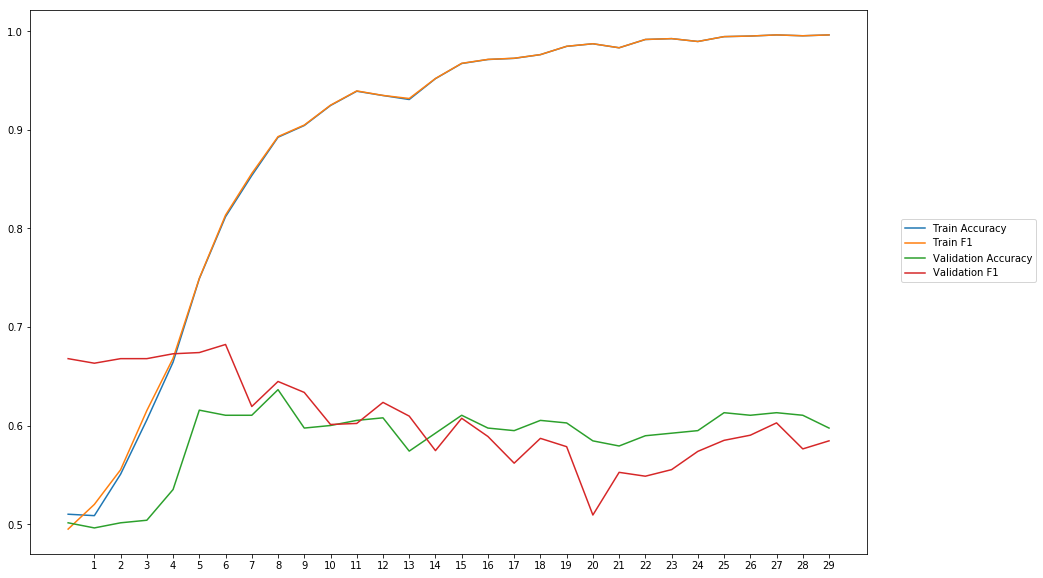

Average Accuracy: 58.61%
Average Precision: 59.05%
Average Recall: 65.61%
Average F1: 60.68%

-----Fold 2--------


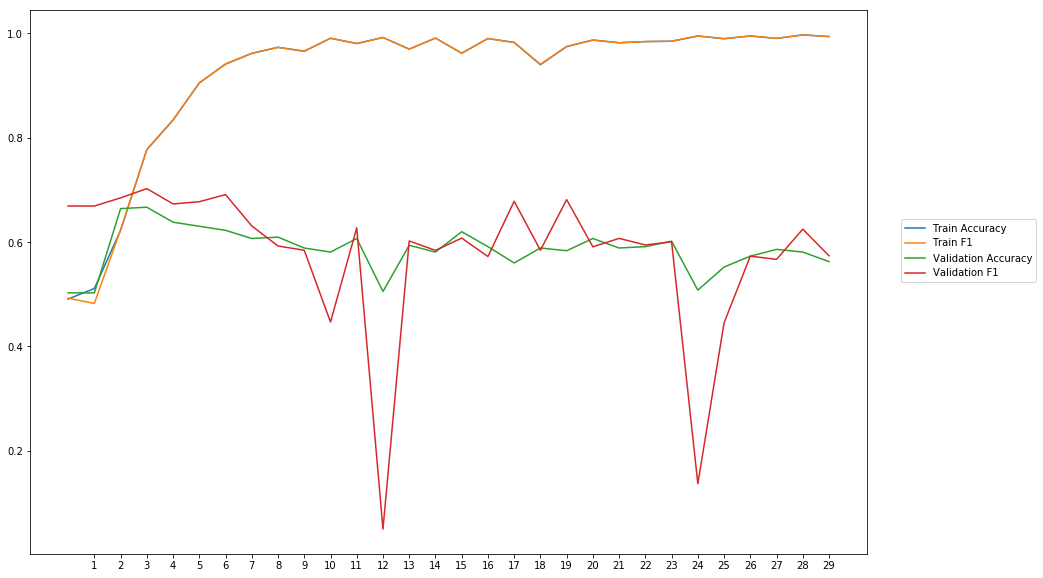

Average Accuracy: 58.64%
Average Precision: 59.51%
Average Recall: 62.04%
Average F1: 57.73%

-----Fold 3--------


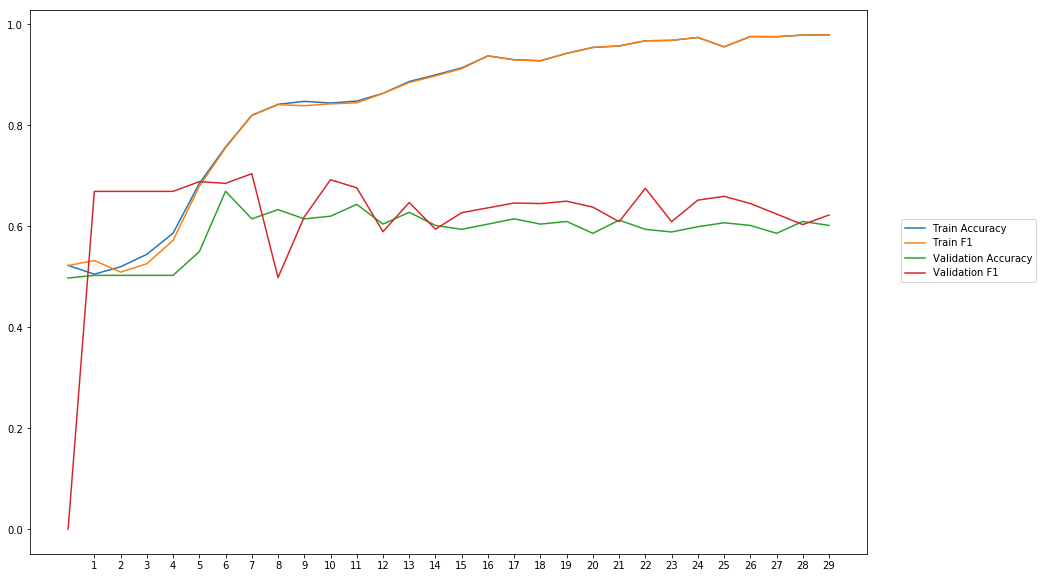

Average Accuracy: 58.98%
Average Precision: 56.81%
Average Recall: 71.57%
Average F1: 62.03%

-----Fold 4--------


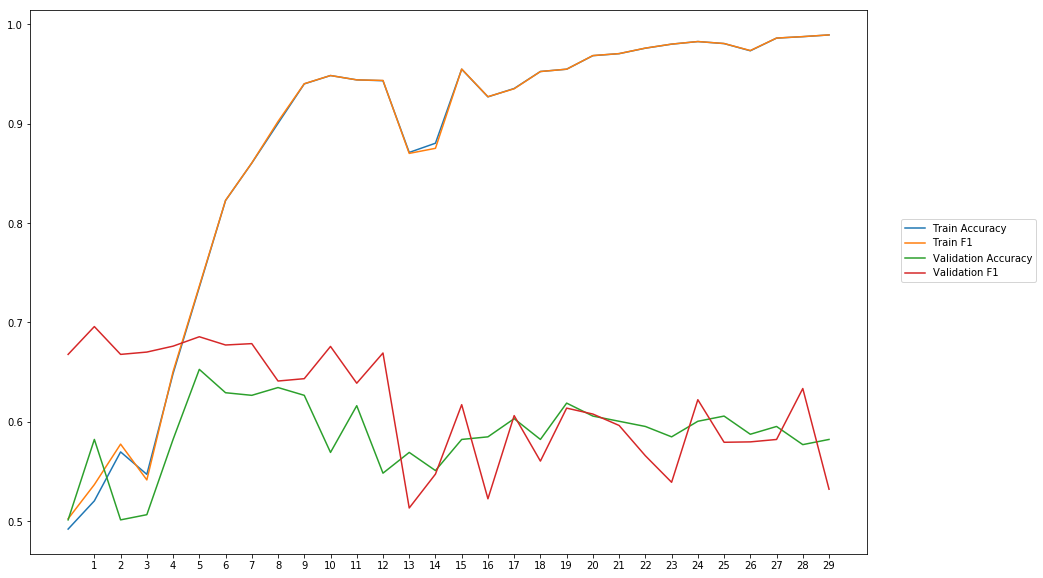

Average Accuracy: 58.68%
Average Precision: 58.39%
Average Recall: 68.51%
Average F1: 61.69%

-----Fold 5--------


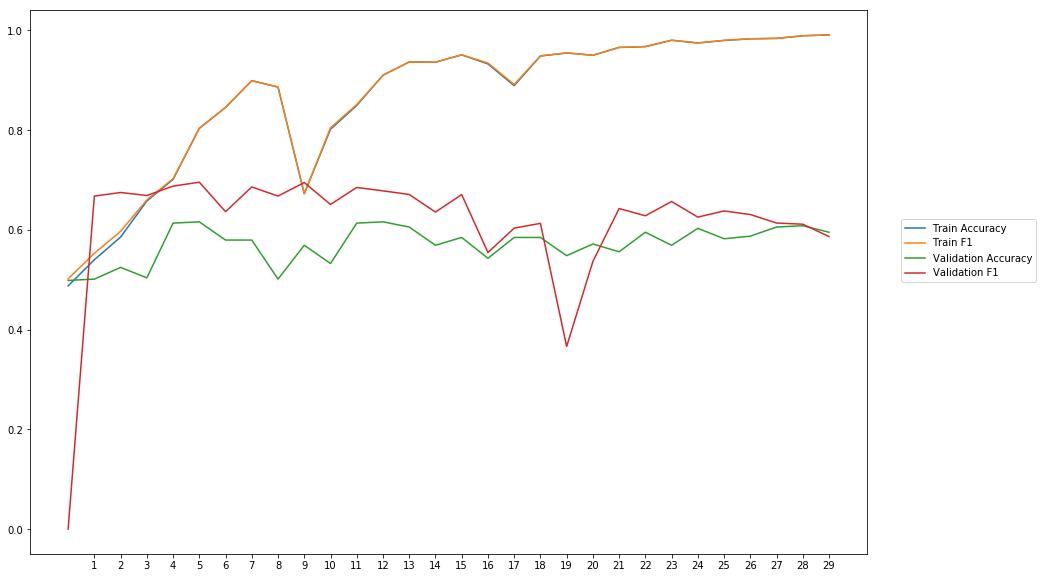

Average Accuracy: 57.15%
Average Precision: 54.34%
Average Recall: 73.58%
Average F1: 61.27%

-----Fold 6--------


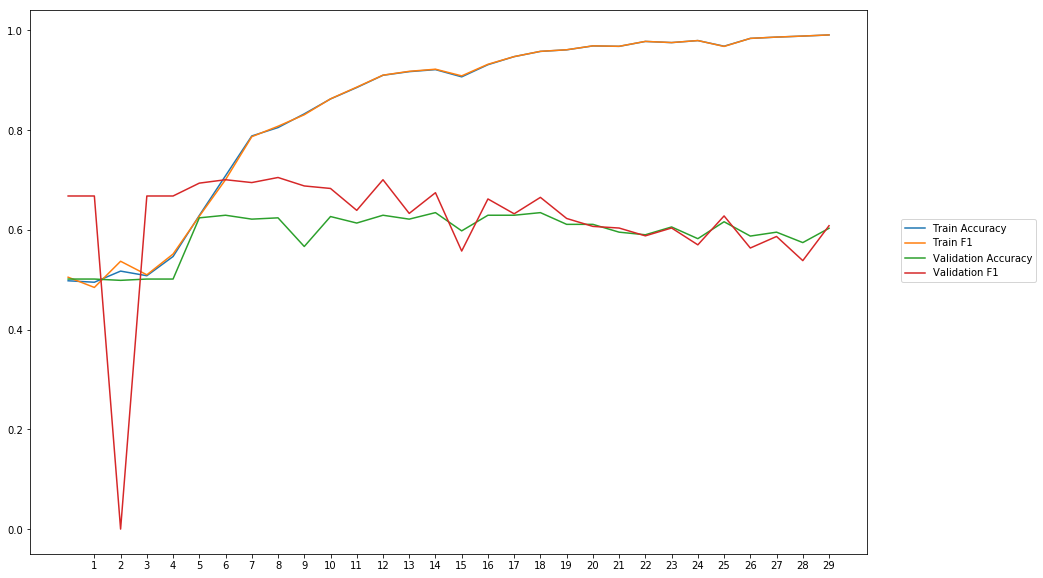

Average Accuracy: 59.19%
Average Precision: 56.58%
Average Recall: 70.71%
Average F1: 61.73%

-----Fold 7--------


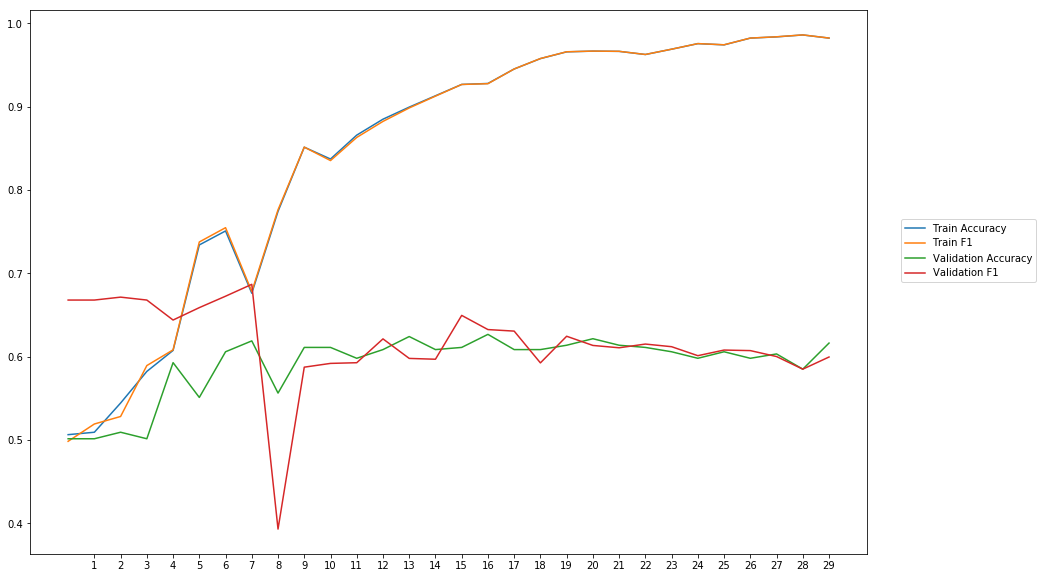

Average Accuracy: 59.08%
Average Precision: 59.14%
Average Recall: 67.53%
Average F1: 61.66%

-----Fold 8--------


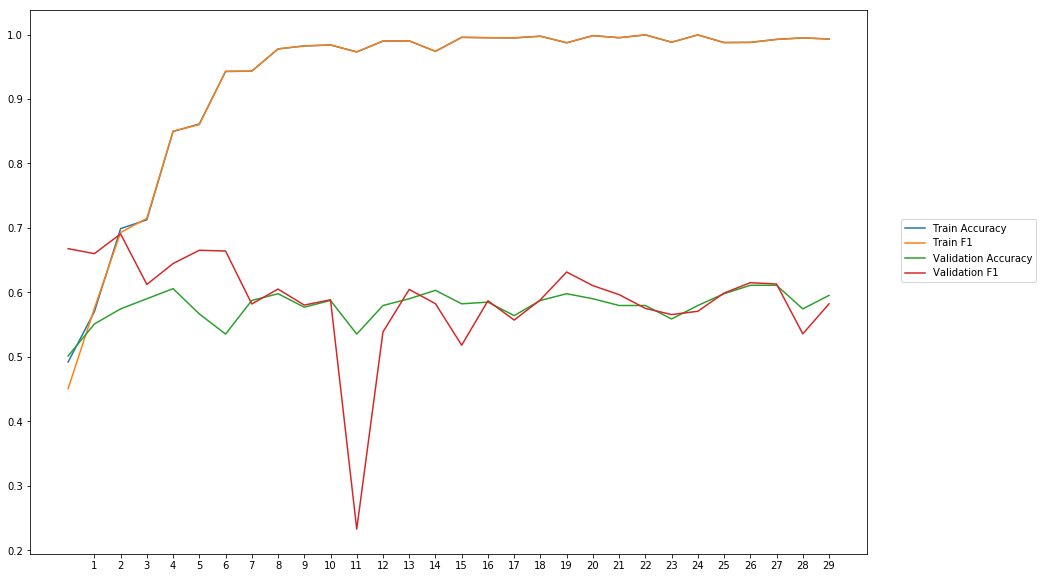

Average Accuracy: 57.92%
Average Precision: 58.26%
Average Recall: 62.74%
Average F1: 58.88%

-----Fold 9--------


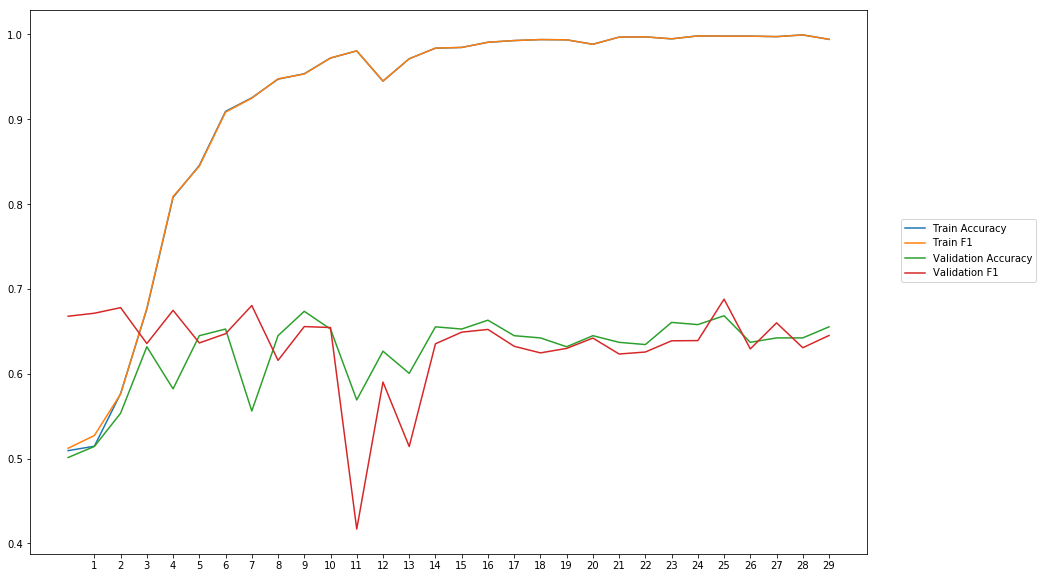

Average Accuracy: 62.58%
Average Precision: 63.56%
Average Recall: 65.85%
Average F1: 63.28%

-----Fold 10--------


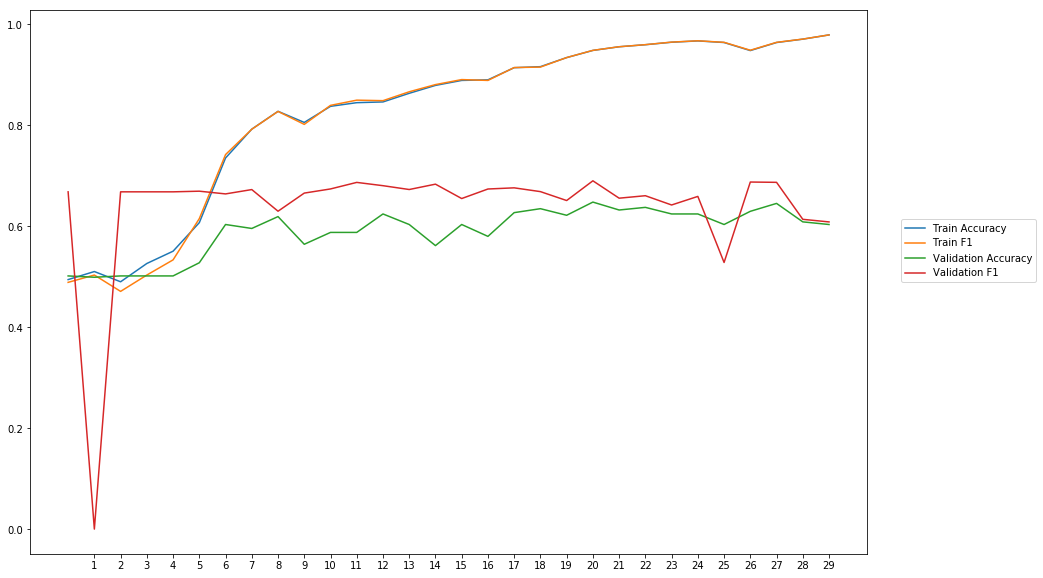

Average Accuracy: 58.98%
Average Precision: 55.77%
Average Recall: 76.82%
Average F1: 63.73%

-------Overallresults-------


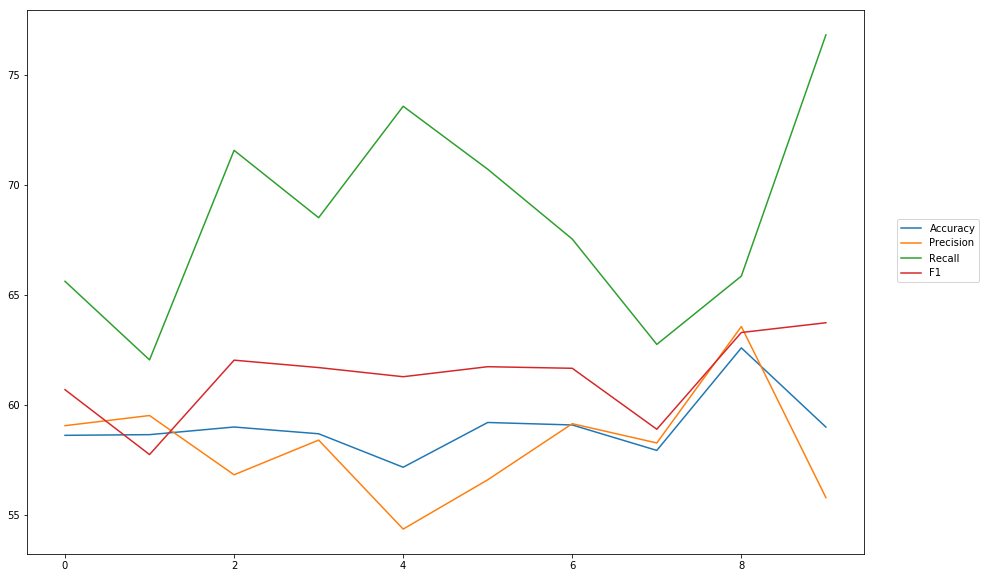

Accuracy: Mean = 58.98% (+/- 1.34%), Max = 62.58%, Min =  57.15%
Precision: Mean = 58.14% (+/- 2.39%), Max = 63.56%, Min =  54.34%
Recall: Mean = 68.50% (+/- 4.48%), Max = 76.82%, Min =  62.04%
F1: Mean = 61.27% (+/- 1.73%), Max = 63.73%, Min =  57.73%


In [14]:
cross_val(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'rnn_1_400')  

## AttentiveRNN two RNN-layers, each 400 neurons

In [ ]:
wv_layer2 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences2 = wv_layer2(comment_input2)

#RNN Layer
x2 = SimpleRNN(400, return_sequences=True, activation='tanh')(embedded_sequences2)

#RNN Layer
x2 = SimpleRNN(400, return_sequences=True, activation='tanh')(x2)

#Attention Layer
x2 = Attention()(x2)

#Output (Dense) Layer
preds2 = Dense(2, activation='softmax')(x2)

# build the model
model2 = Model(inputs=[comment_input2], outputs=preds2)


-----Fold 1--------


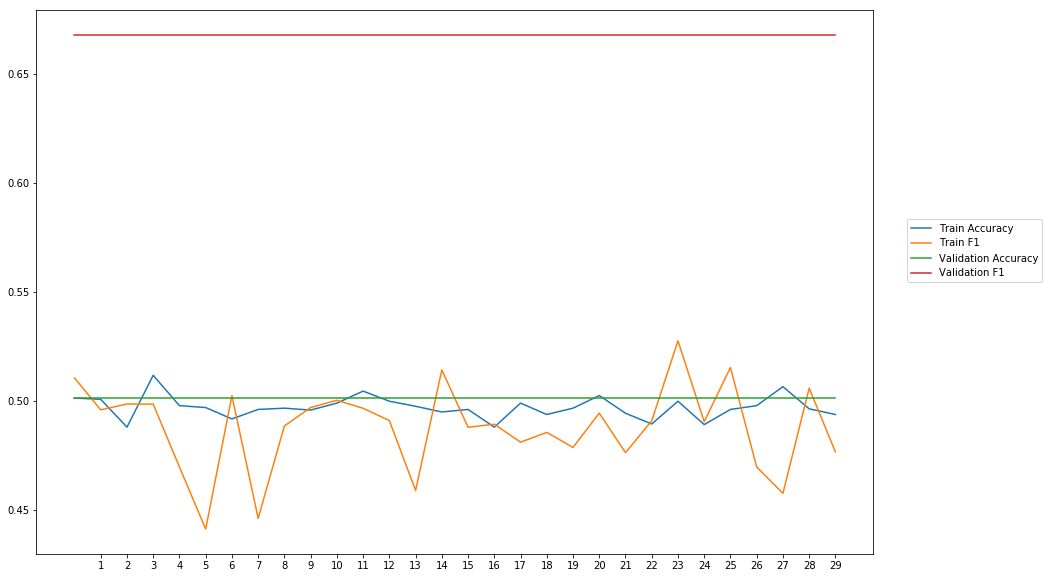

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-----Fold 2--------


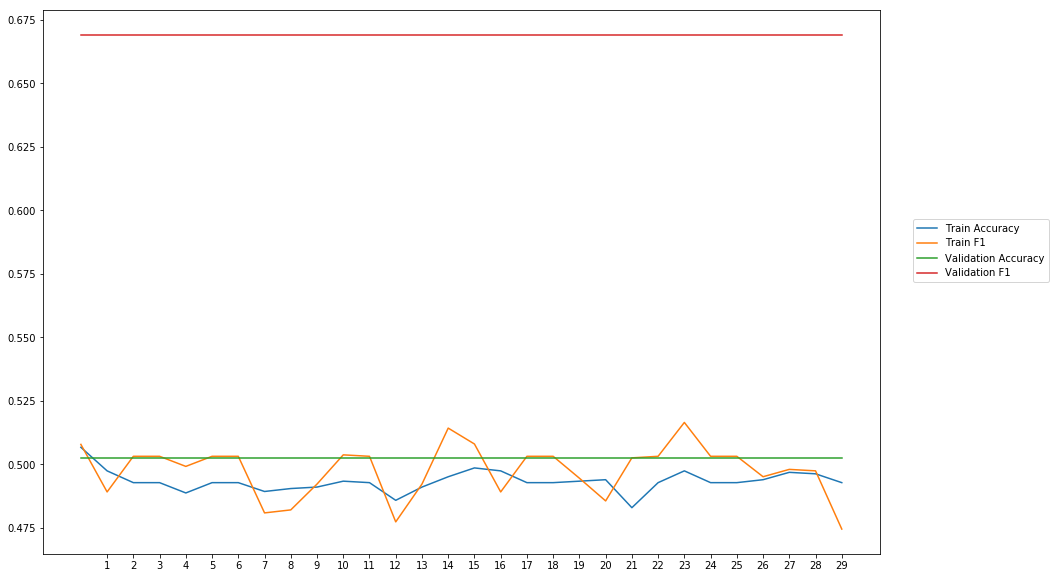

Average Accuracy: 50.26%
Average Precision: 50.26%
Average Recall: 100.00%
Average F1: 66.90%

-----Fold 3--------


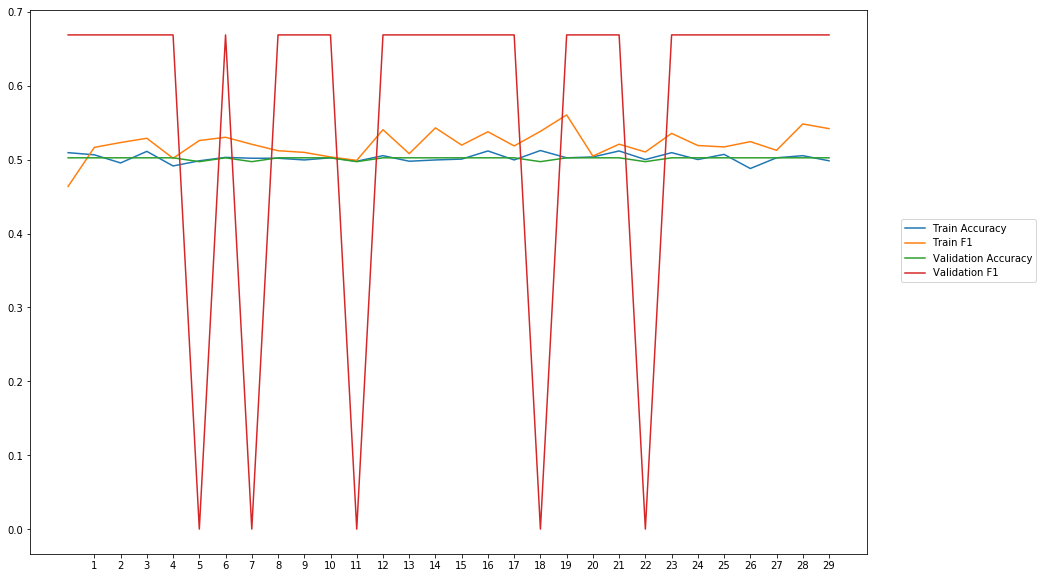

Average Accuracy: 50.17%
Average Precision: 41.88%
Average Recall: 83.33%
Average F1: 55.75%

-----Fold 4--------


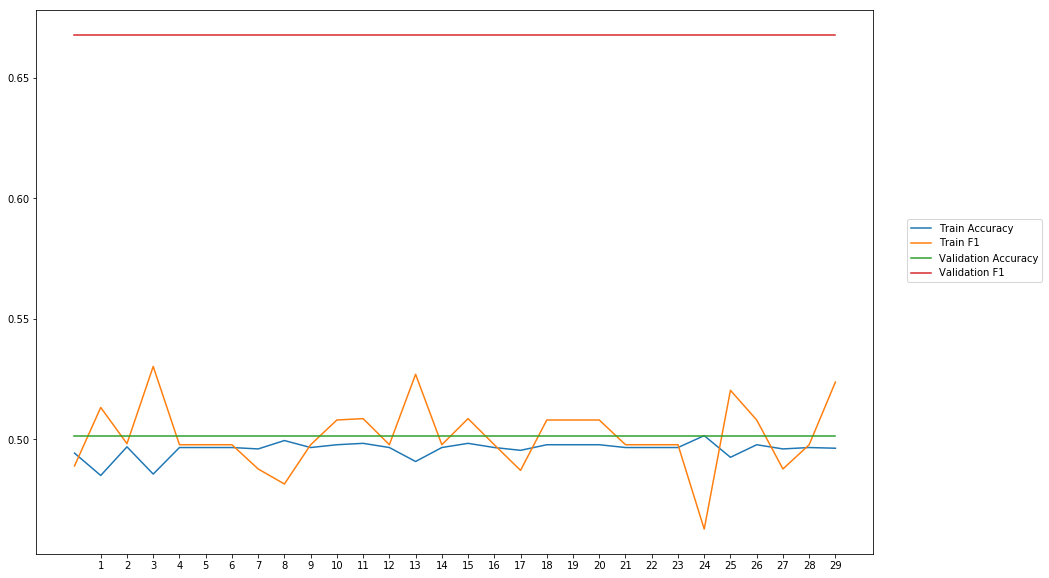

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-----Fold 5--------


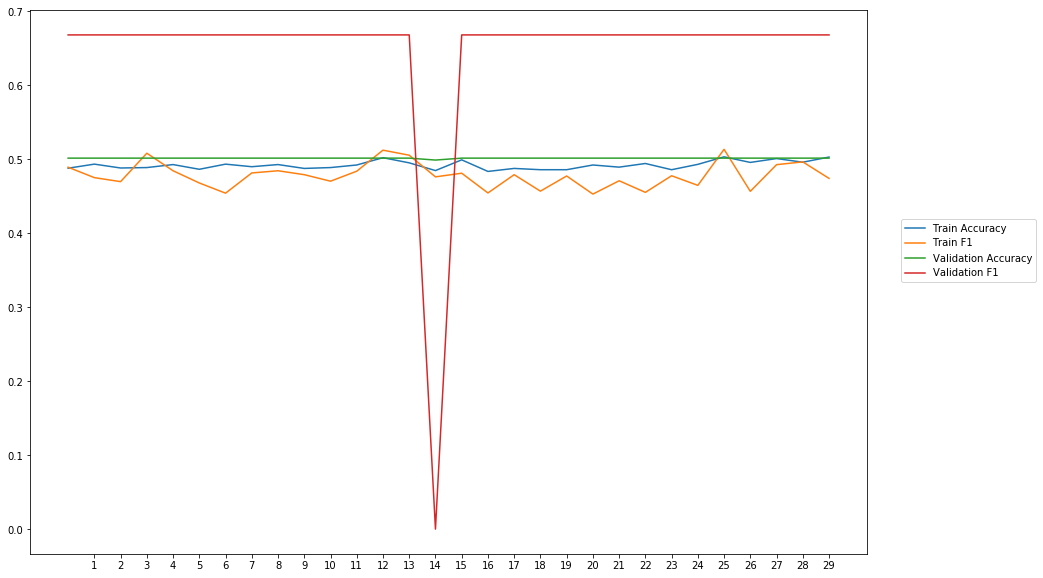

Average Accuracy: 50.12%
Average Precision: 48.46%
Average Recall: 96.67%
Average F1: 64.56%

-----Fold 6--------


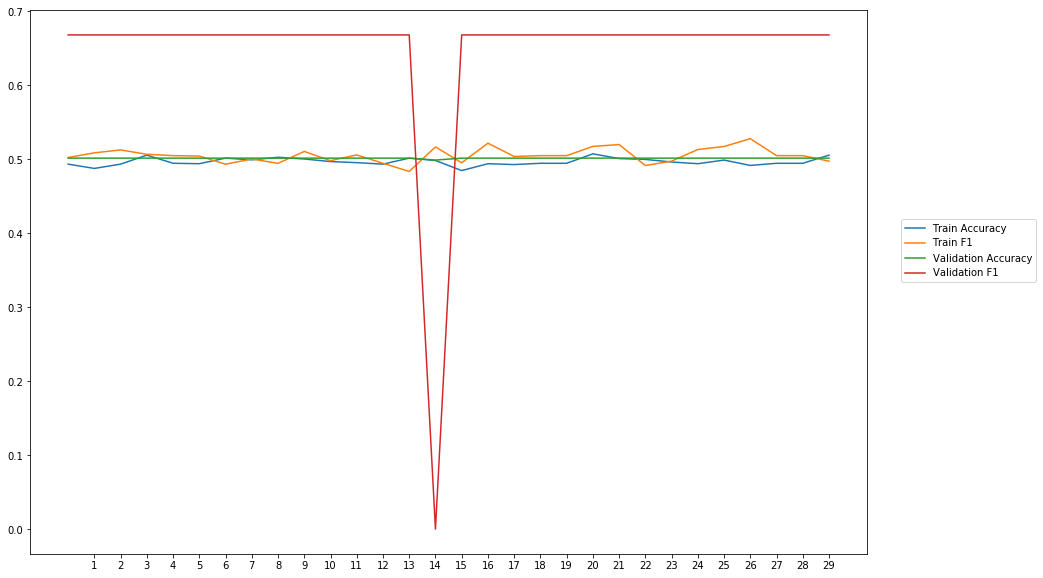

Average Accuracy: 50.12%
Average Precision: 48.46%
Average Recall: 96.67%
Average F1: 64.56%

-----Fold 7--------


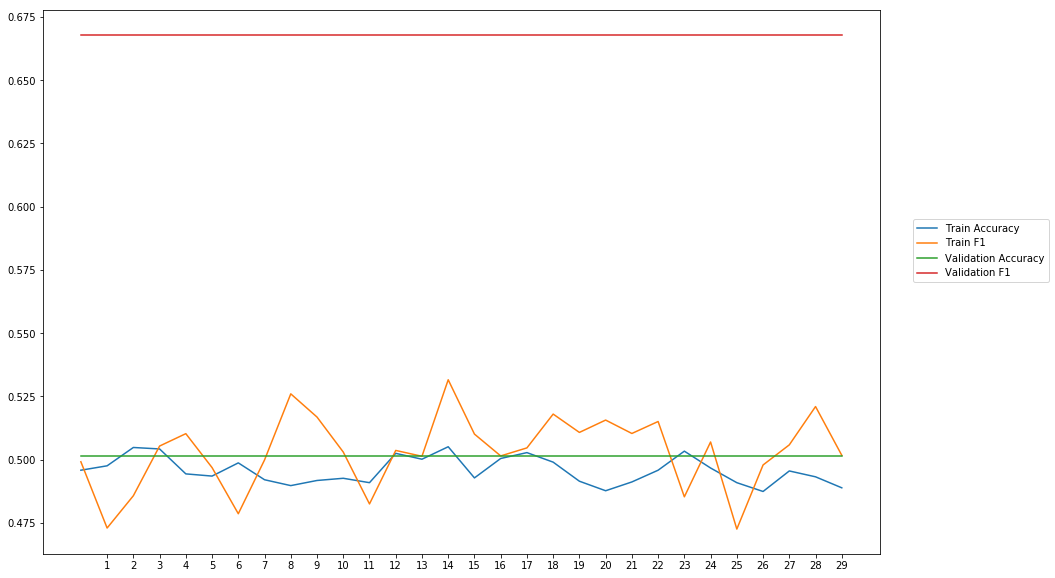

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-----Fold 8--------


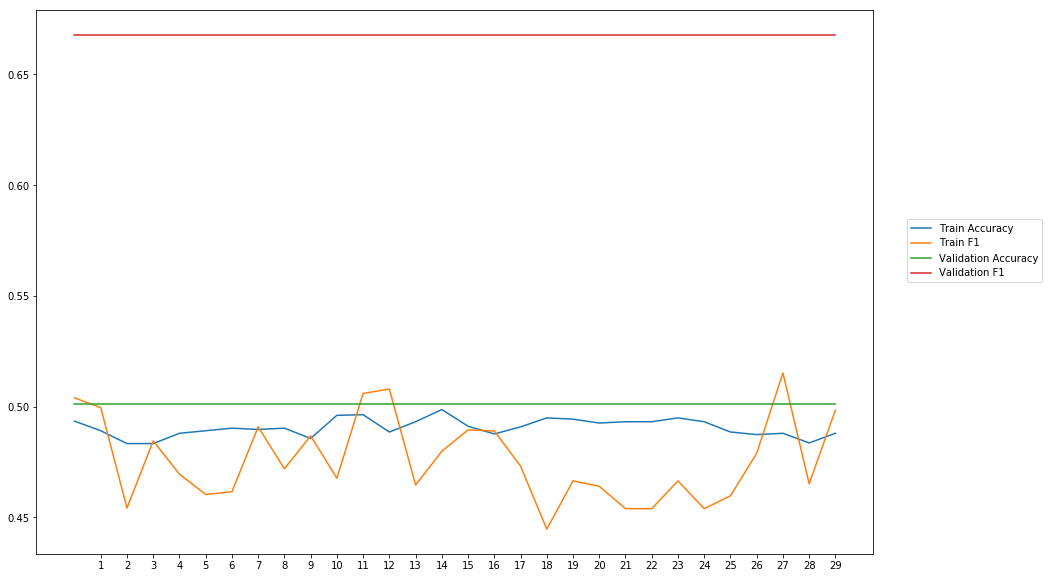

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-----Fold 9--------


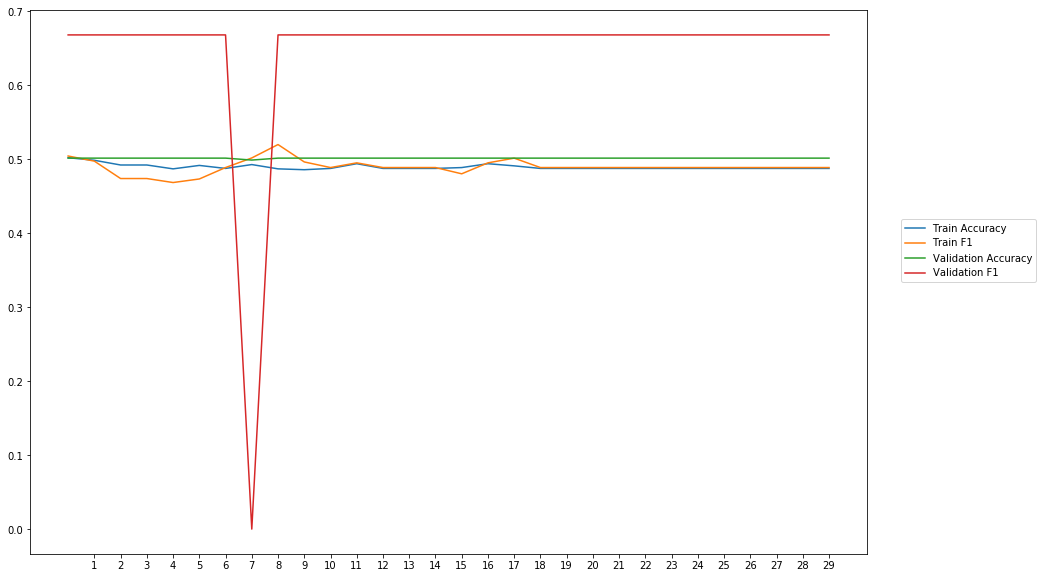

Average Accuracy: 50.12%
Average Precision: 48.46%
Average Recall: 96.67%
Average F1: 64.56%

-----Fold 10--------


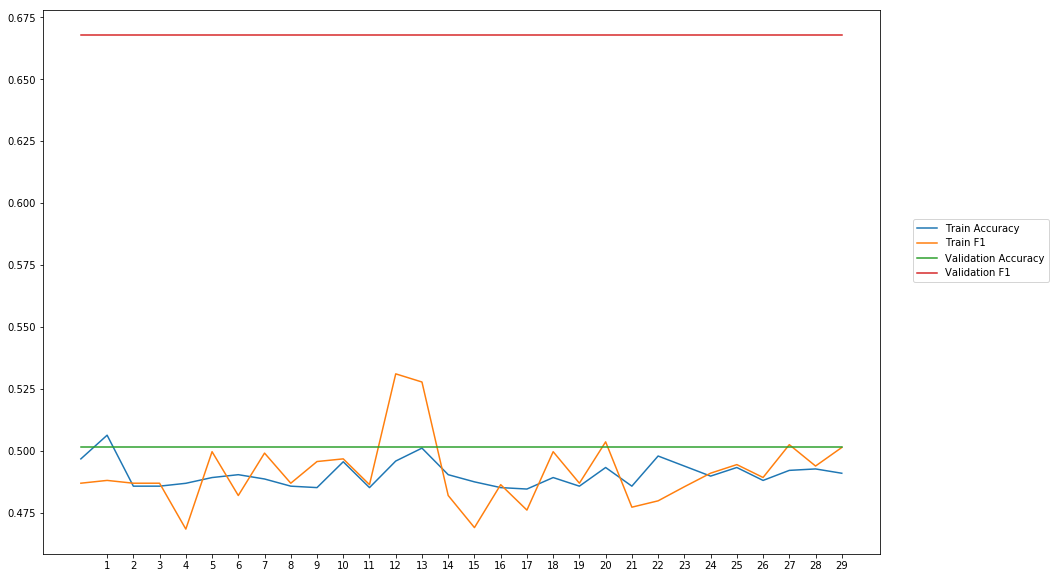

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-------Overallresults-------


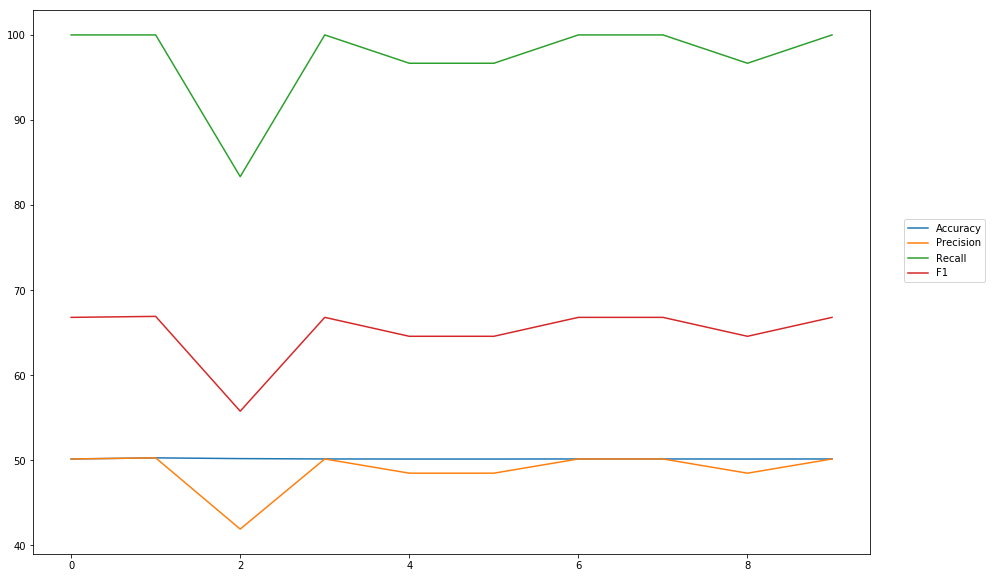

Accuracy: Mean = 50.15% (+/- 0.04%), Max = 50.26%, Min =  50.12%
Precision: Mean = 48.82% (+/- 2.43%), Max = 50.26%, Min =  41.88%
Recall: Mean = 97.33% (+/- 4.90%), Max = 100.00%, Min =  83.33%
F1: Mean = 65.02% (+/- 3.25%), Max = 66.90%, Min =  55.75%


In [18]:
cross_val(model2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'rnn_2_400')  

## AttentiveRNN two RNN-layers, first 400 neurons, second 300

In [ ]:
#Define the Networkarchitekture
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer3 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences3 = wv_layer3(comment_input3)

#RNN Layer
x3 = SimpleRNN(400, return_sequences=True, activation='tanh')(embedded_sequences3)

#RNN Layer
x3 = SimpleRNN(300, return_sequences=True, activation='tanh')(x3)

#Attention Layer
x3 = Attention()(x3)

#Output (Dense) Layer
preds3 = Dense(2, activation='softmax')(x3)

# build the model
model3 = Model(inputs=[comment_input3], outputs=preds3)


-----Fold 1--------


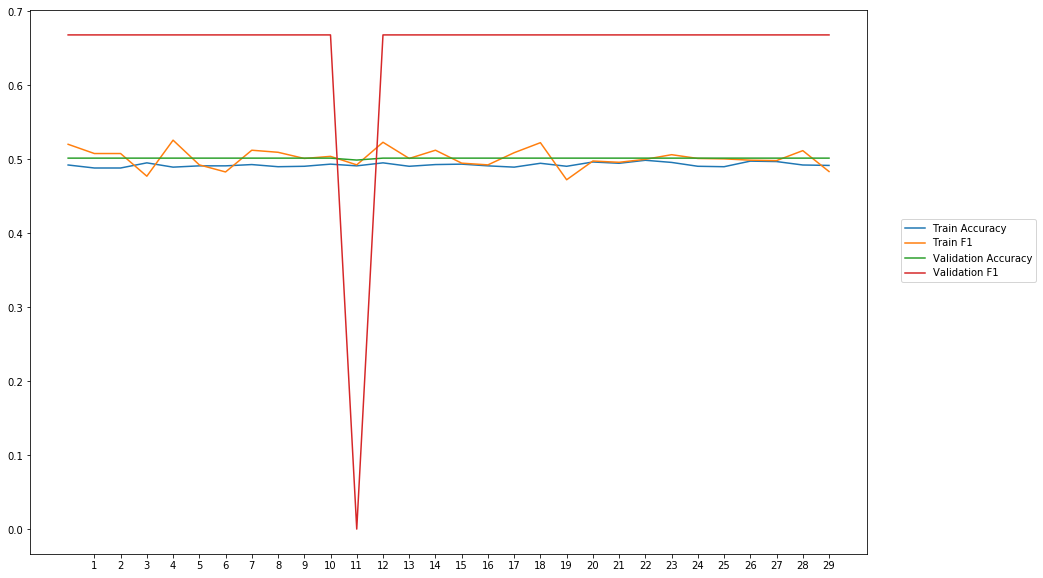

Average Accuracy: 50.12%
Average Precision: 48.46%
Average Recall: 96.67%
Average F1: 64.56%

-----Fold 2--------


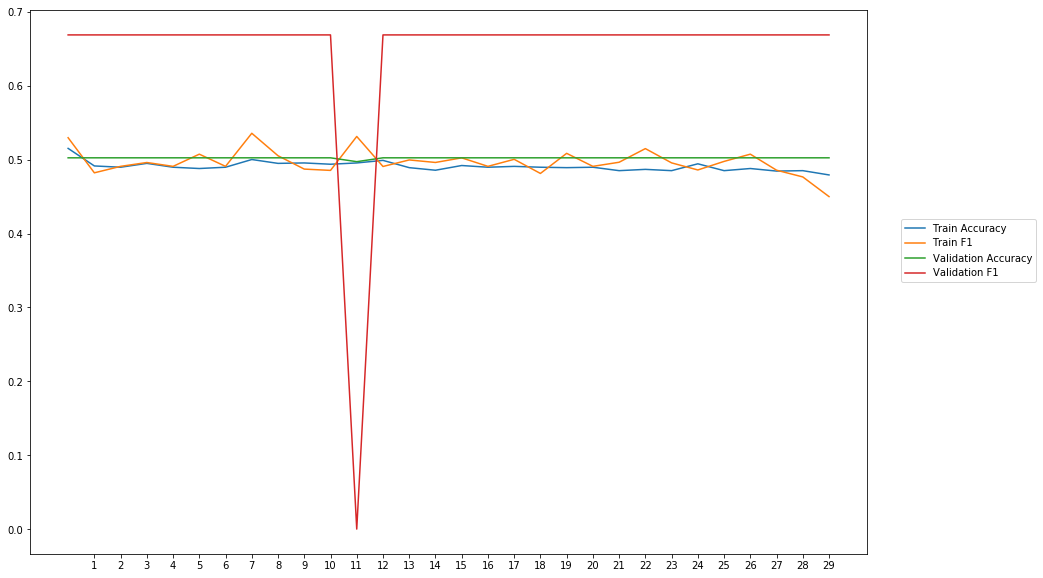

Average Accuracy: 50.24%
Average Precision: 48.59%
Average Recall: 96.67%
Average F1: 64.67%

-----Fold 3--------


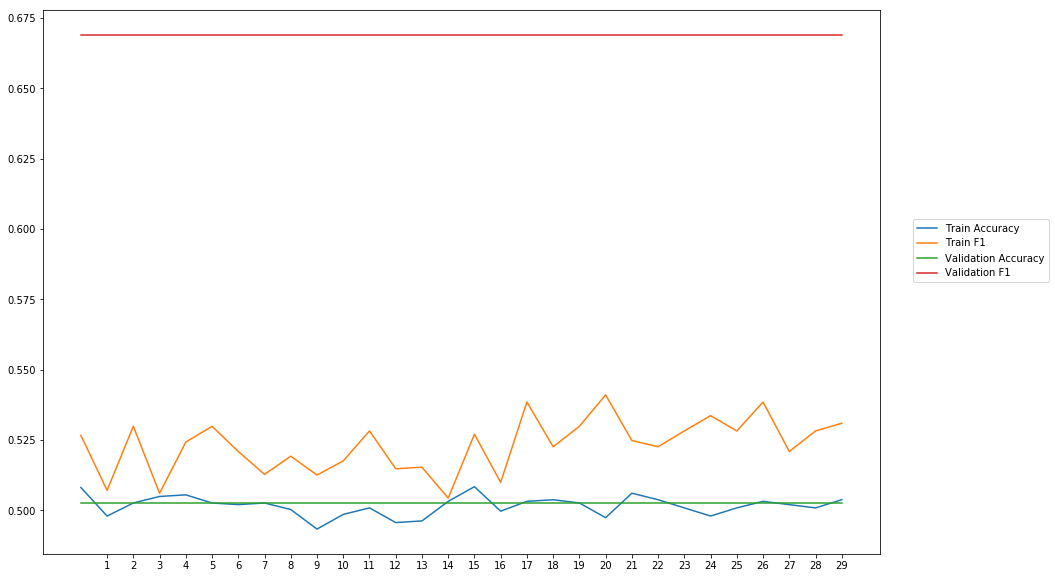

Average Accuracy: 50.26%
Average Precision: 50.26%
Average Recall: 100.00%
Average F1: 66.90%

-----Fold 4--------


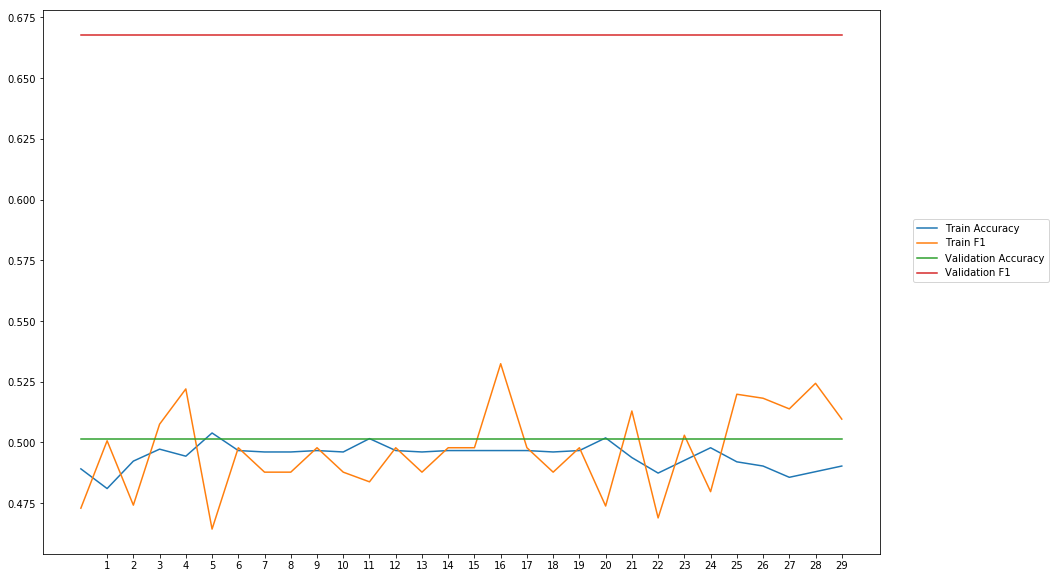

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-----Fold 5--------


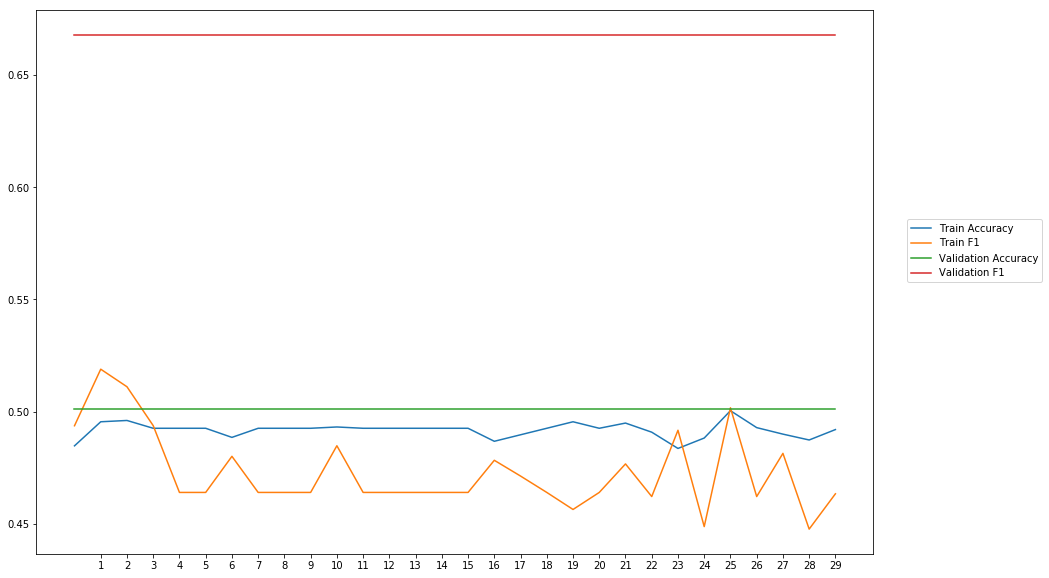

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-----Fold 6--------


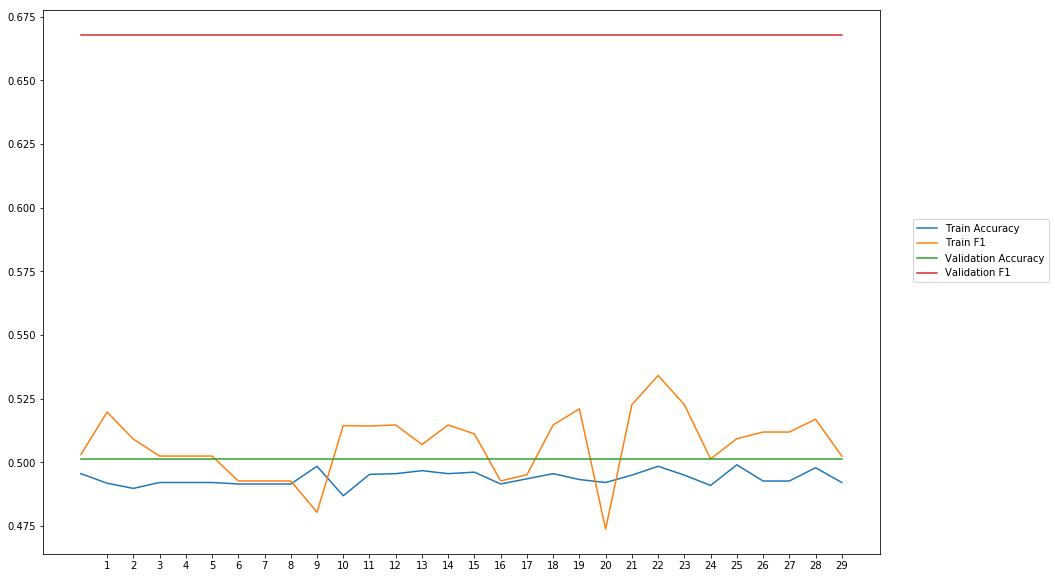

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-----Fold 7--------


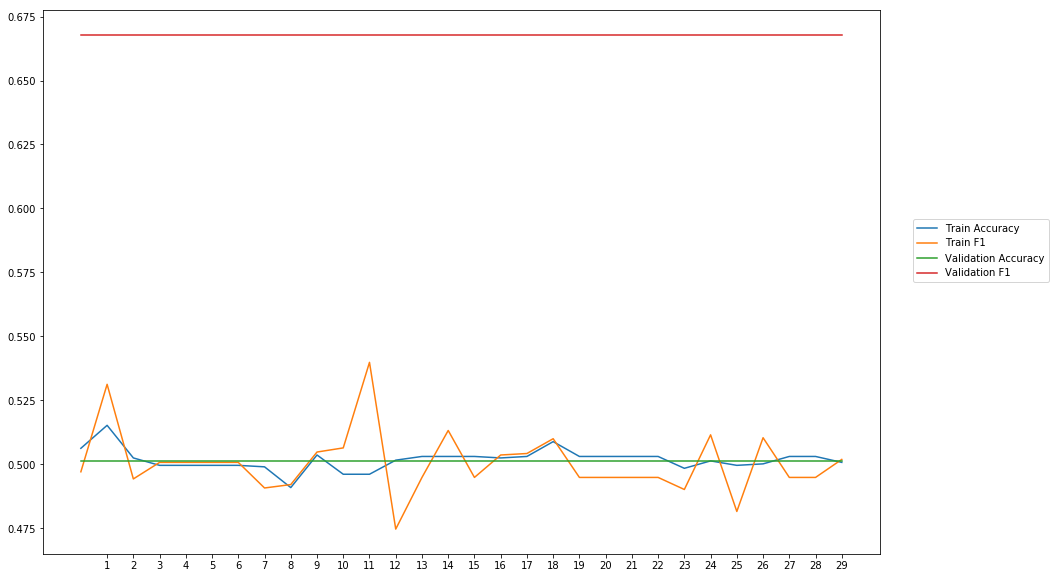

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-----Fold 8--------


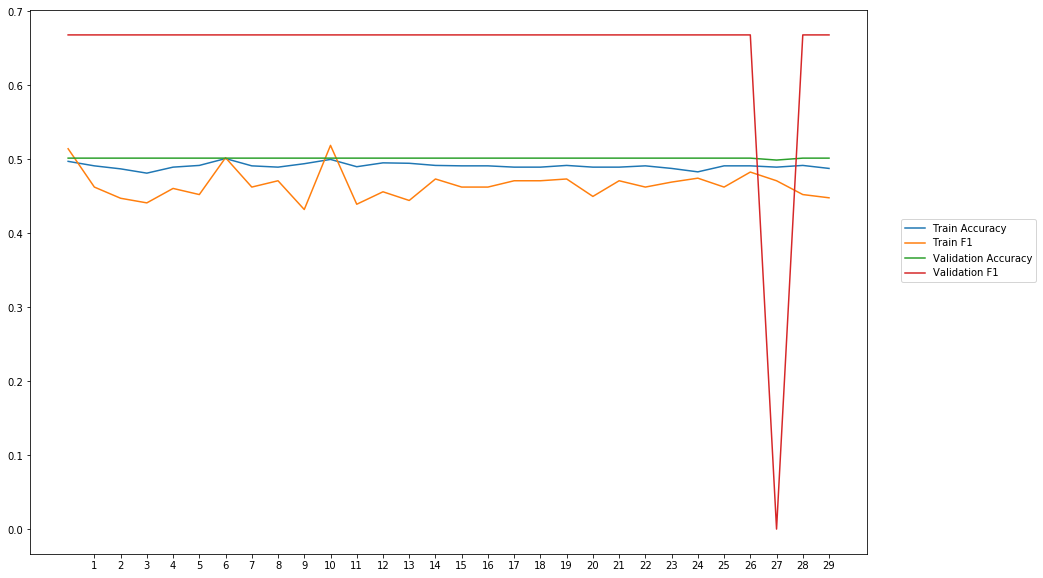

Average Accuracy: 50.12%
Average Precision: 48.46%
Average Recall: 96.67%
Average F1: 64.56%

-----Fold 9--------


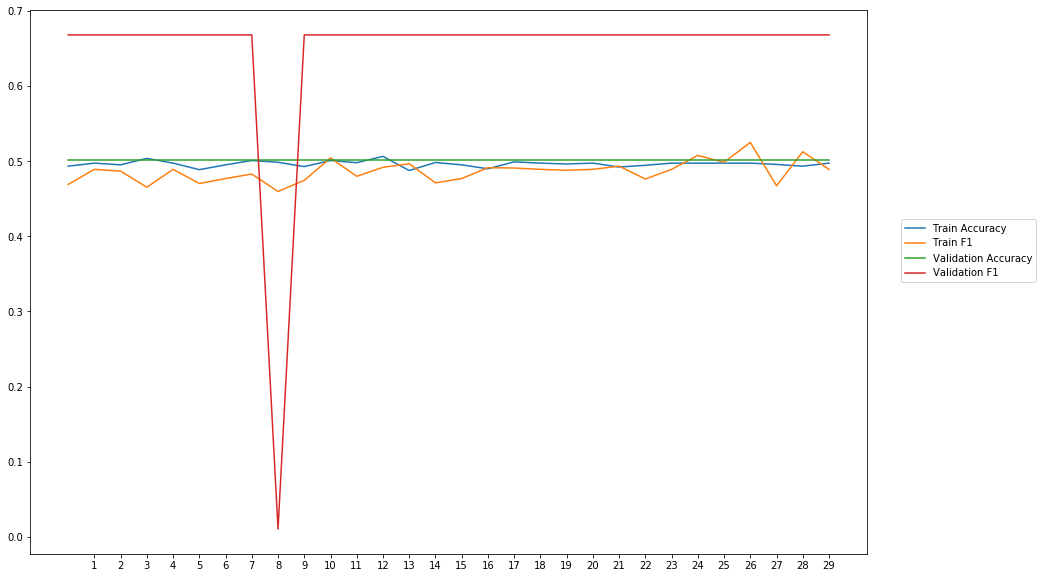

Average Accuracy: 50.13%
Average Precision: 51.79%
Average Recall: 96.68%
Average F1: 64.59%

-----Fold 10--------


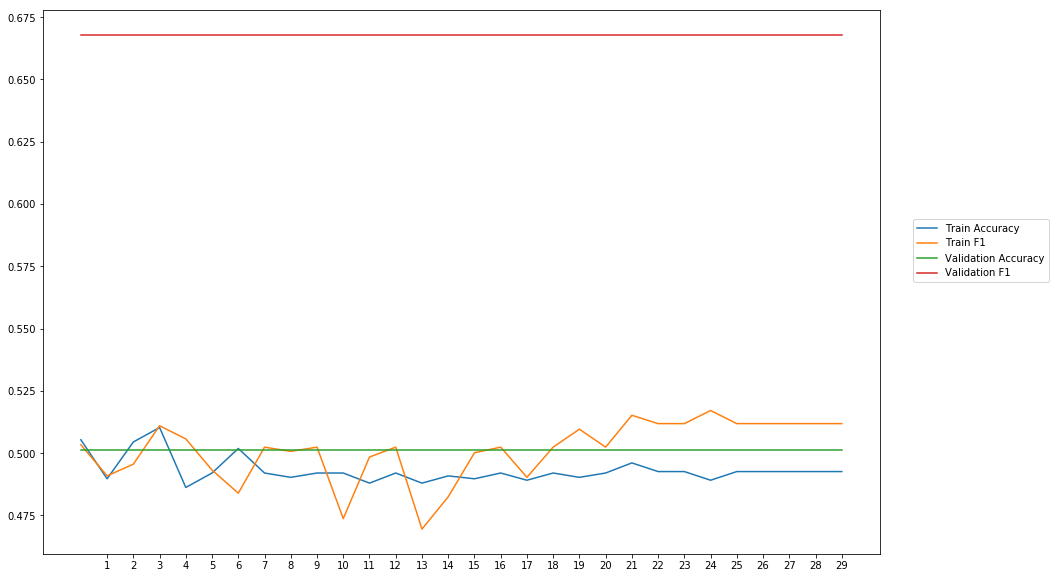

Average Accuracy: 50.13%
Average Precision: 50.13%
Average Recall: 100.00%
Average F1: 66.78%

-------Overallresults-------


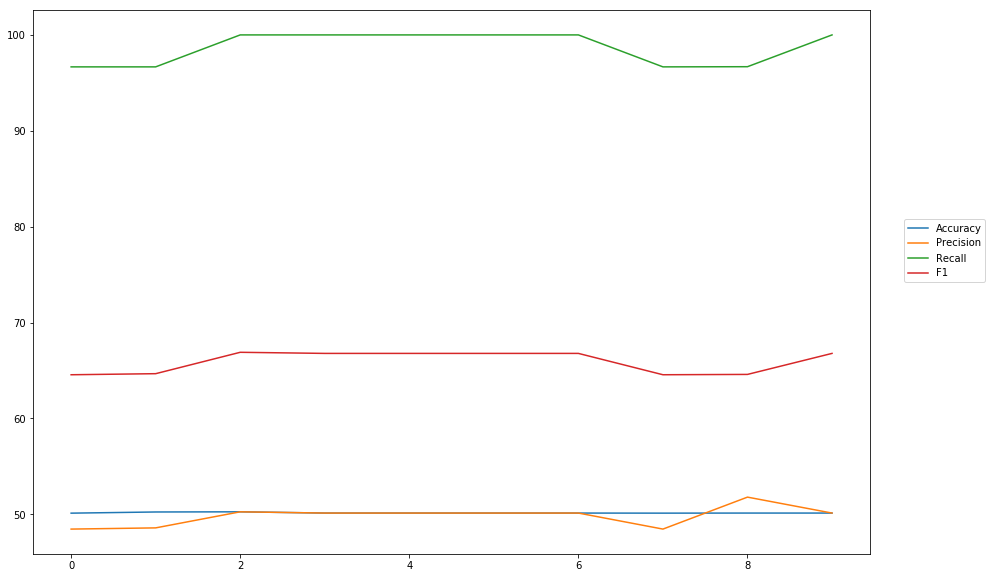

Accuracy: Mean = 50.15% (+/- 0.05%), Max = 50.26%, Min =  50.12%
Precision: Mean = 49.82% (+/- 0.99%), Max = 51.79%, Min =  48.46%
Recall: Mean = 98.67% (+/- 1.63%), Max = 100.00%, Min =  96.67%
F1: Mean = 65.92% (+/- 1.08%), Max = 66.90%, Min =  64.56%


In [19]:
cross_val(model3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'rnn_2_400_300')  

## AttentiveRNN one RNN-layer, 500 neurons

In [ ]:
wv_layer4 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences4 = wv_layer4(comment_input4)

#RNN Layer
x4 = SimpleRNN(500, return_sequences=True, activation='tanh')(embedded_sequences4)

#Attention Layer
x4 = Attention()(x4)

#Output (Dense) Layer
preds4 = Dense(2, activation='softmax')(x4)

# build the model
model4 = Model(inputs=[comment_input4], outputs=preds4)


-----Fold 1--------


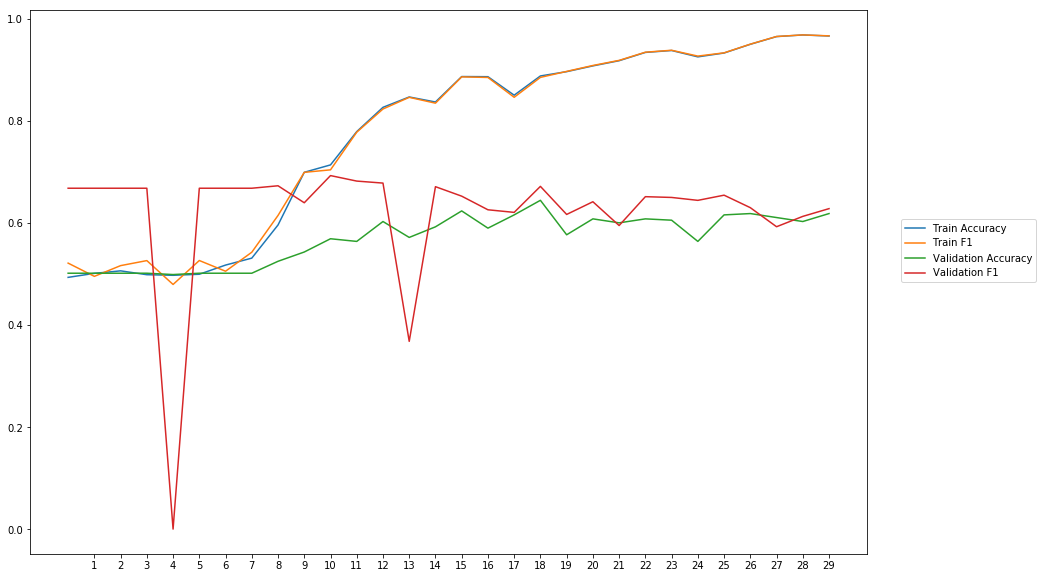

Average Accuracy: 56.91%
Average Precision: 54.71%
Average Recall: 75.85%
Average F1: 61.87%

-----Fold 2--------


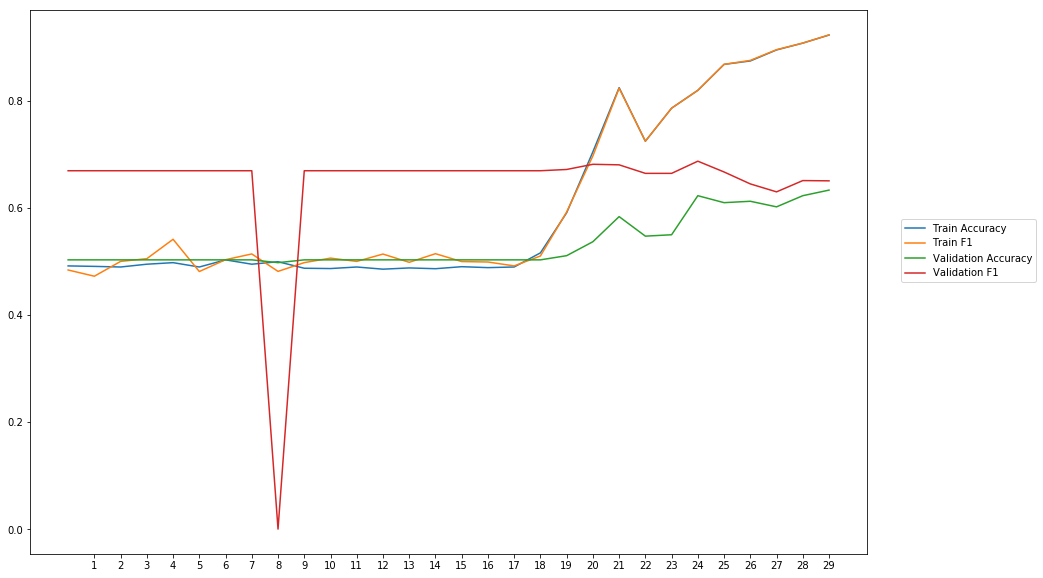

Average Accuracy: 53.24%
Average Precision: 50.94%
Average Recall: 89.97%
Average F1: 64.43%

-----Fold 3--------


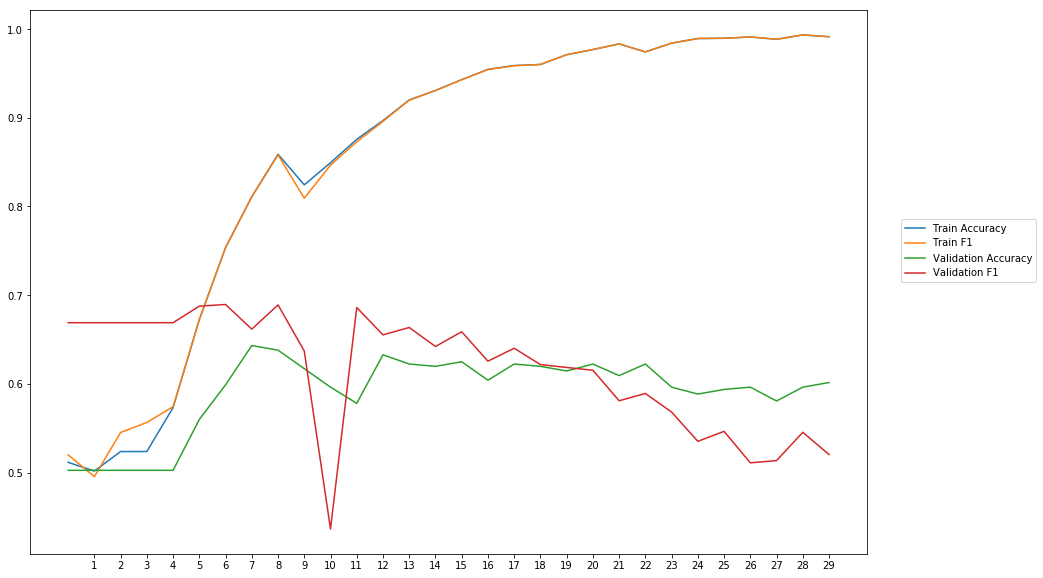

Average Accuracy: 59.05%
Average Precision: 59.82%
Average Recall: 68.60%
Average F1: 61.61%

-----Fold 4--------


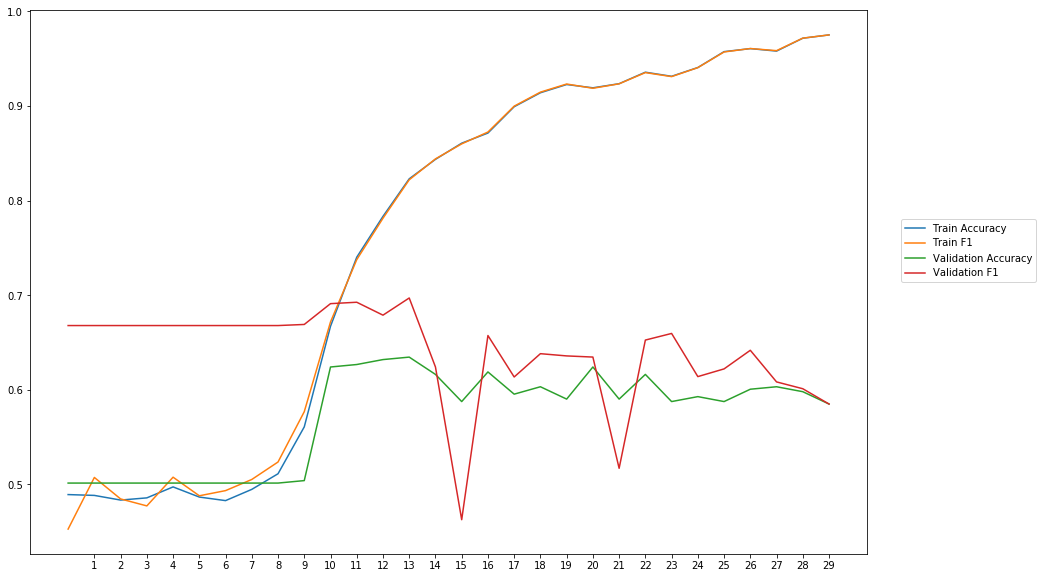

Average Accuracy: 57.09%
Average Precision: 56.53%
Average Recall: 78.35%
Average F1: 64.02%

-----Fold 5--------


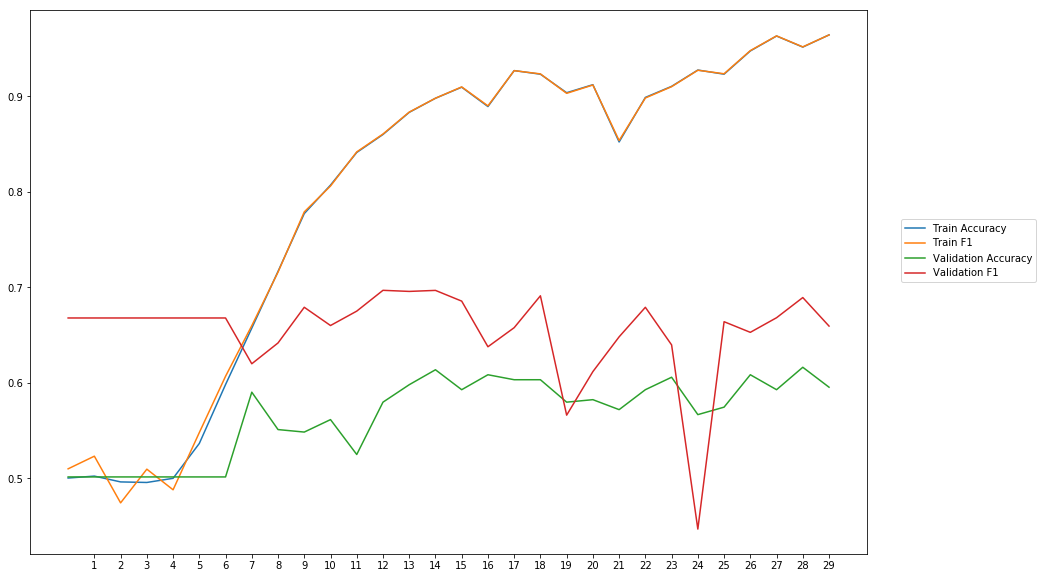

Average Accuracy: 56.56%
Average Precision: 55.06%
Average Recall: 83.85%
Average F1: 65.45%

-----Fold 6--------


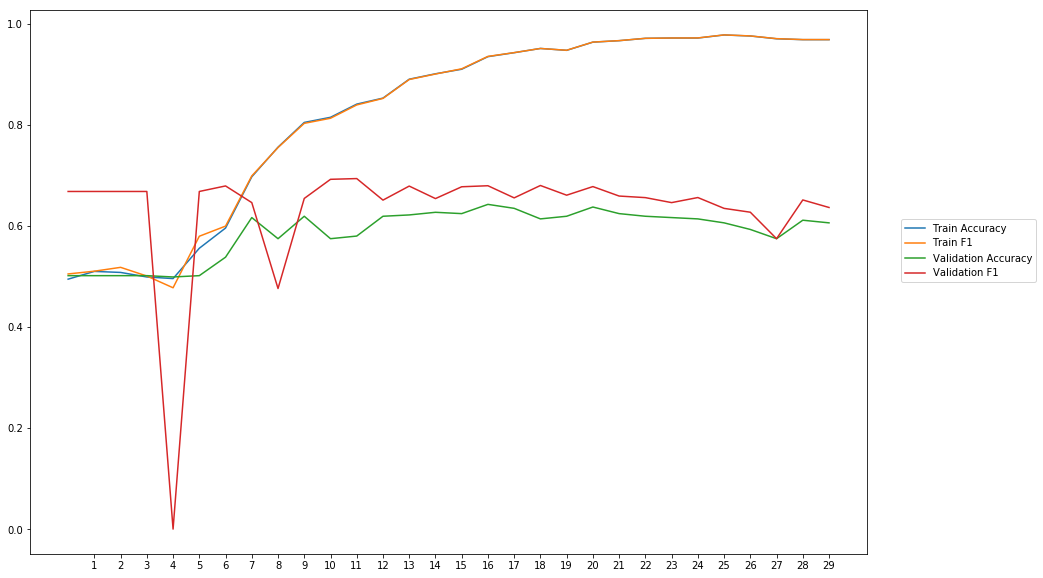

Average Accuracy: 58.69%
Average Precision: 55.65%
Average Recall: 75.56%
Average F1: 63.10%

-----Fold 7--------


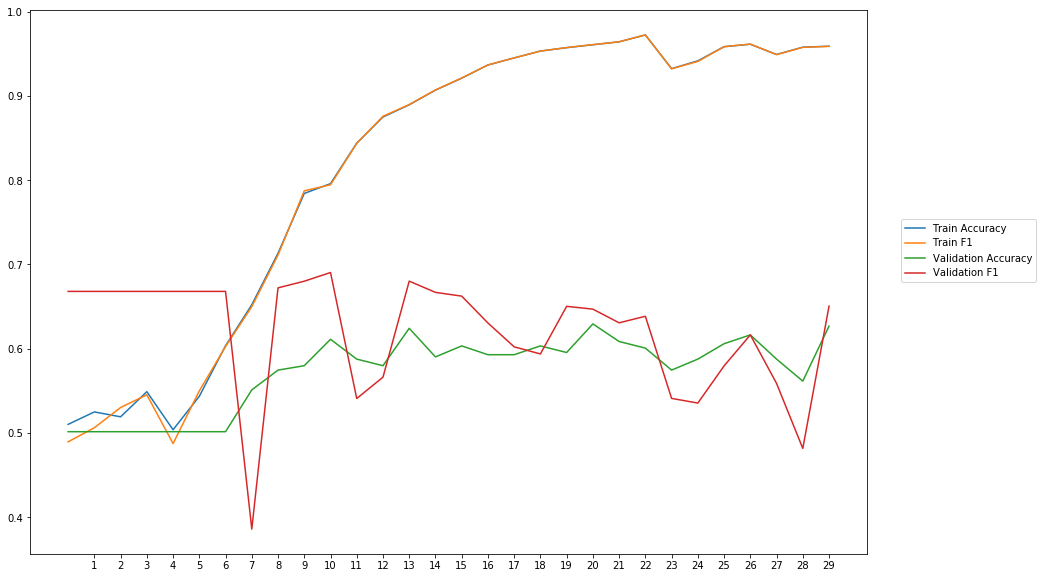

Average Accuracy: 57.30%
Average Precision: 57.10%
Average Recall: 72.53%
Average F1: 61.91%

-----Fold 8--------


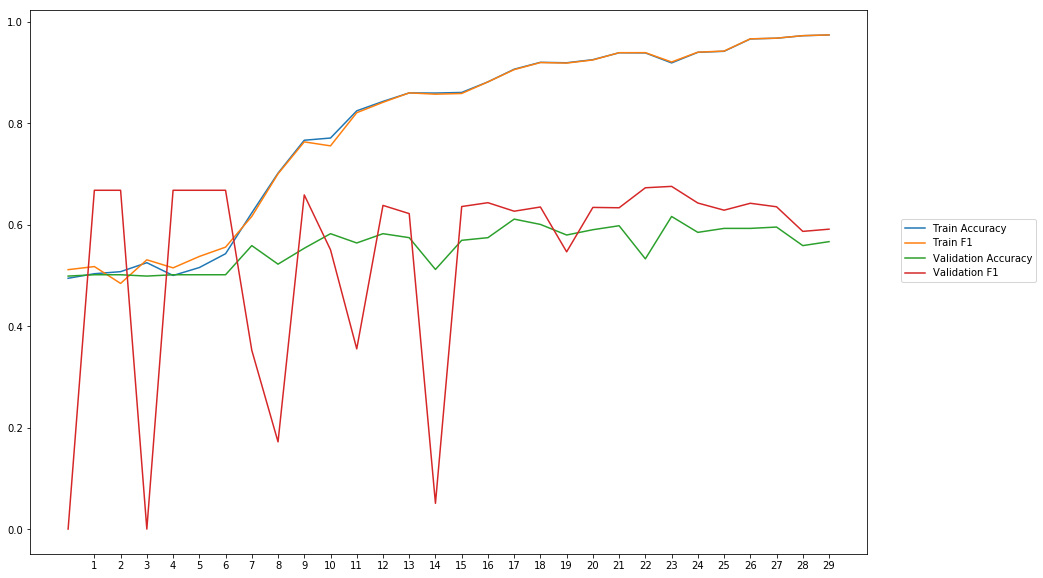

Average Accuracy: 55.72%
Average Precision: 54.45%
Average Recall: 63.47%
Average F1: 53.89%

-----Fold 9--------


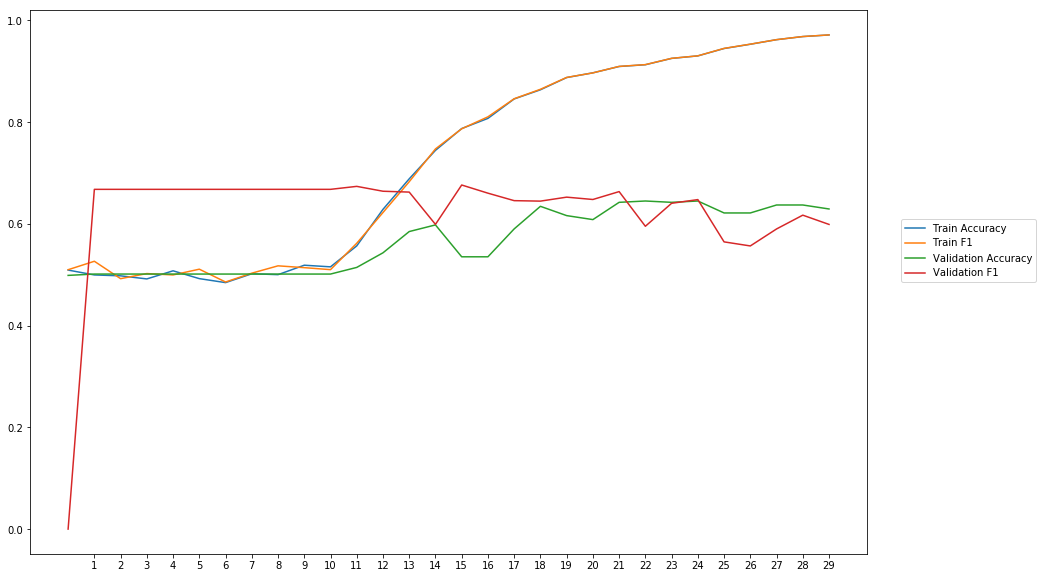

Average Accuracy: 56.64%
Average Precision: 55.25%
Average Recall: 77.19%
Average F1: 62.26%

-----Fold 10--------


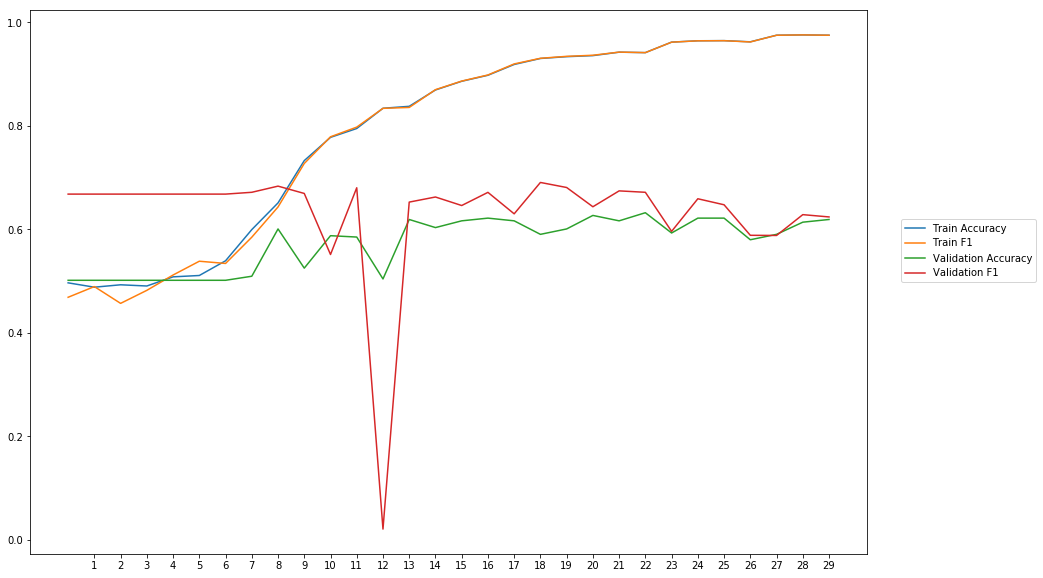

Average Accuracy: 57.33%
Average Precision: 57.90%
Average Recall: 77.60%
Average F1: 63.00%

-------Overallresults-------


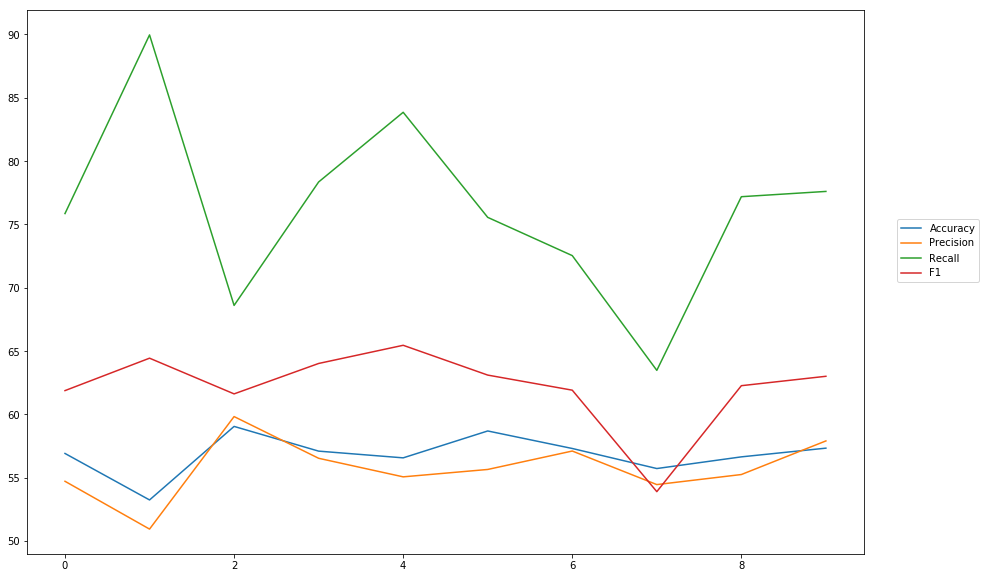

Accuracy: Mean = 56.85% (+/- 1.52%), Max = 59.05%, Min =  53.24%
Precision: Mean = 55.74% (+/- 2.24%), Max = 59.82%, Min =  50.94%
Recall: Mean = 76.30% (+/- 6.99%), Max = 89.97%, Min =  63.47%
F1: Mean = 62.16% (+/- 3.00%), Max = 65.45%, Min =  53.89%


In [20]:
cross_val(model4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'rnn_1_500')  

## AttentiveRNN one RNN-layer, 300 neurons

In [ ]:
wv_layer5 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences5 = wv_layer5(comment_input5)

#RNN Layer
x5 = SimpleRNN(300, return_sequences=True, activation='tanh')(embedded_sequences5)

#Attention Layer
x5 = Attention()(x5)

#Output (Dense) Layer
preds5 = Dense(2, activation='softmax')(x5)

# build the model
model5 = Model(inputs=[comment_input5], outputs=preds5)


-----Fold 1--------


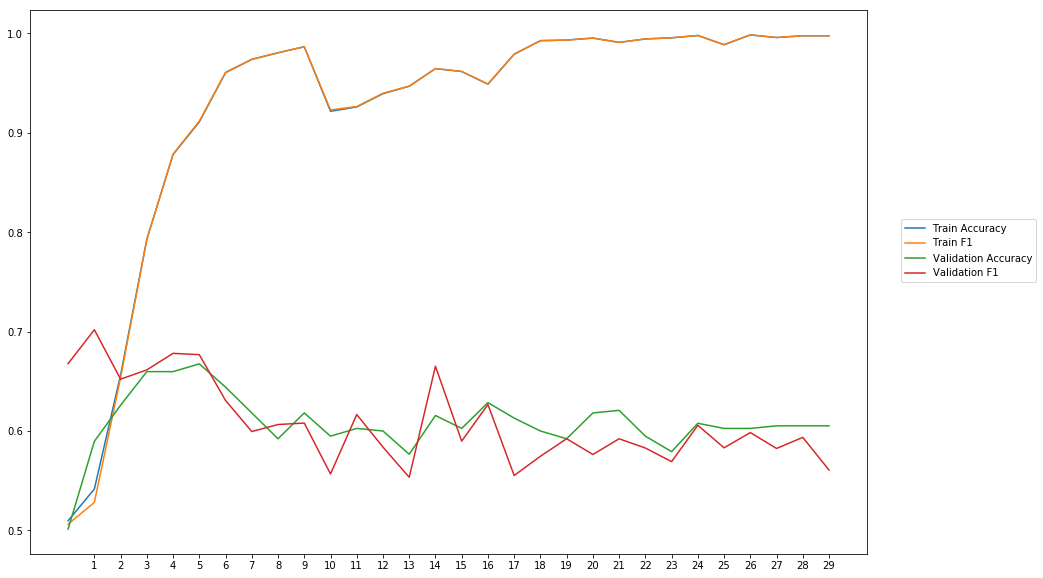

Average Accuracy: 60.81%
Average Precision: 61.39%
Average Recall: 61.61%
Average F1: 60.81%

-----Fold 2--------


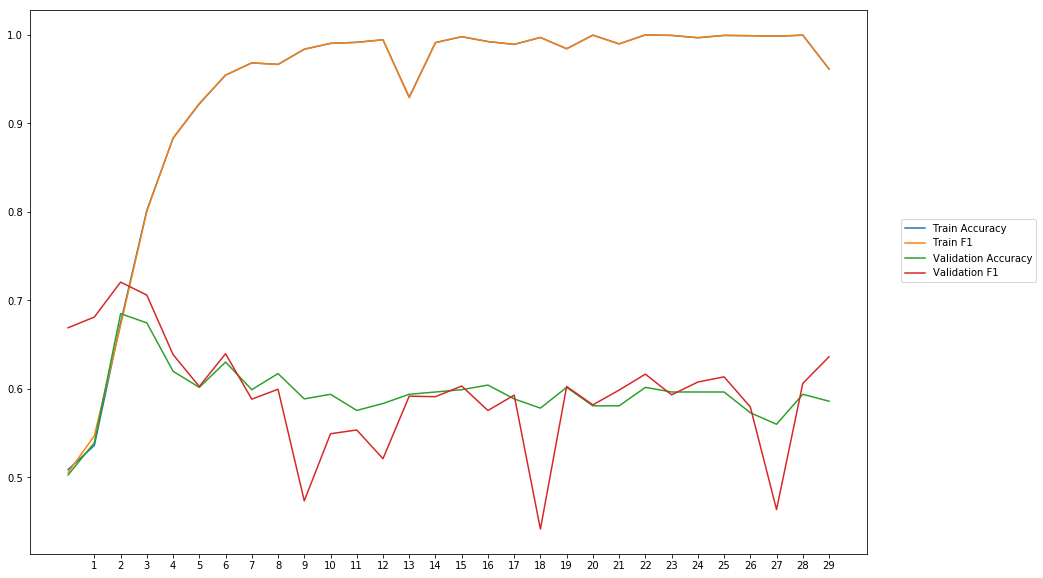

Average Accuracy: 59.45%
Average Precision: 60.16%
Average Recall: 60.95%
Average F1: 59.45%

-----Fold 3--------


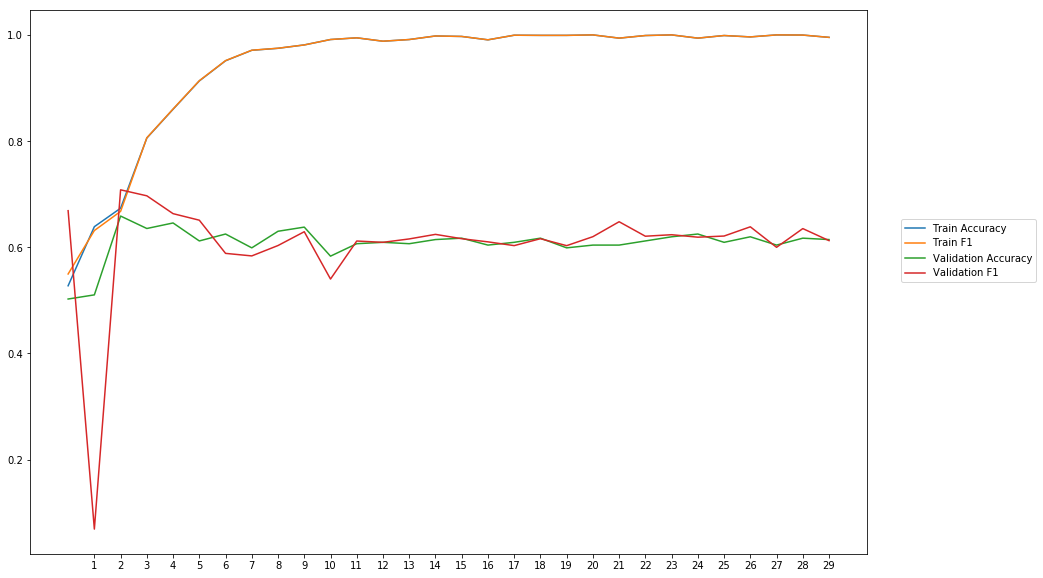

Average Accuracy: 60.85%
Average Precision: 61.69%
Average Recall: 62.61%
Average F1: 60.51%

-----Fold 4--------


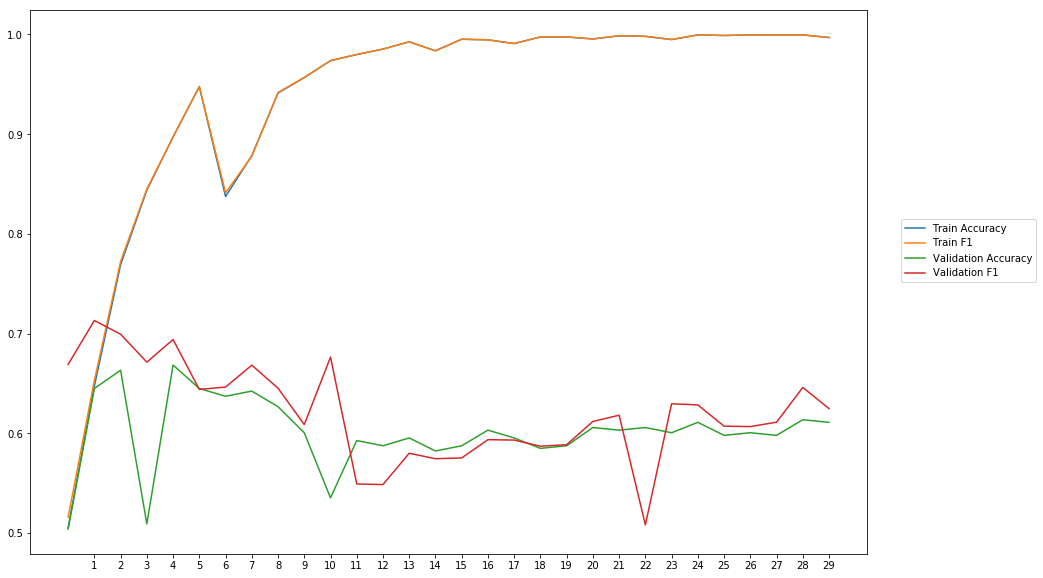

Average Accuracy: 60.13%
Average Precision: 59.92%
Average Recall: 66.42%
Average F1: 62.06%

-----Fold 5--------


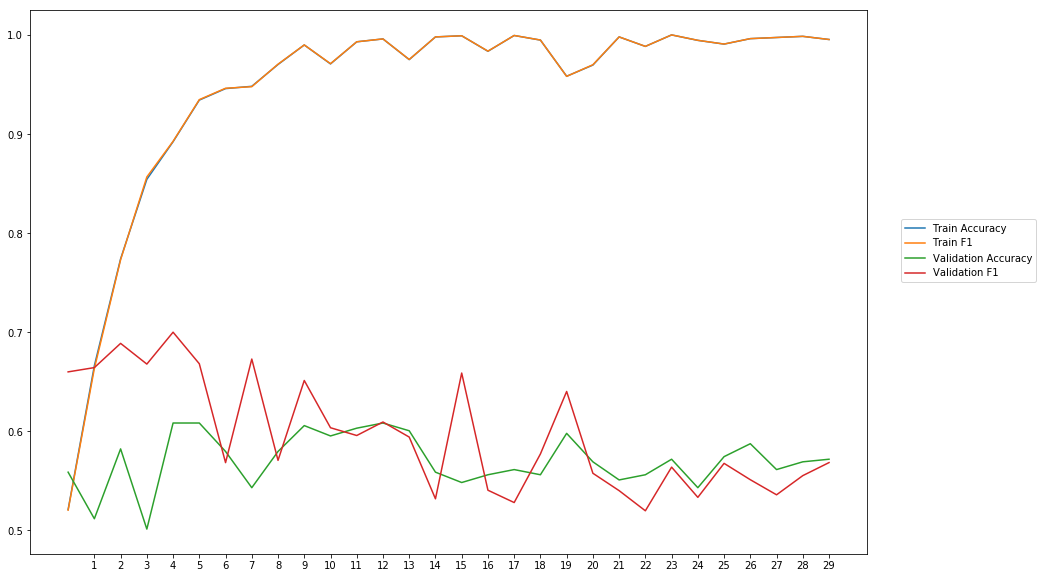

Average Accuracy: 57.07%
Average Precision: 56.77%
Average Recall: 65.31%
Average F1: 59.62%

-----Fold 6--------


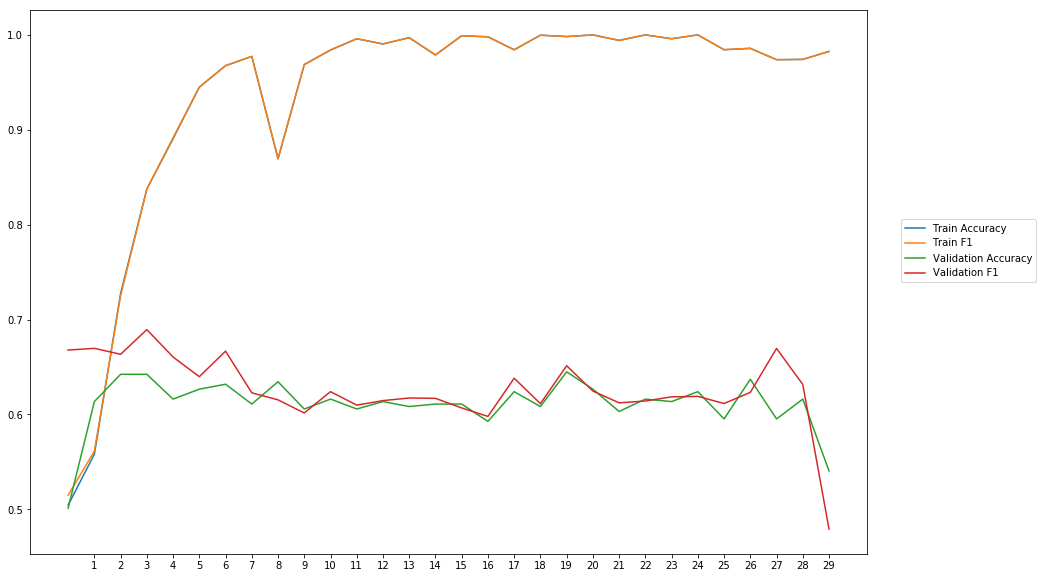

Average Accuracy: 61.10%
Average Precision: 60.65%
Average Recall: 65.71%
Average F1: 62.63%

-----Fold 7--------


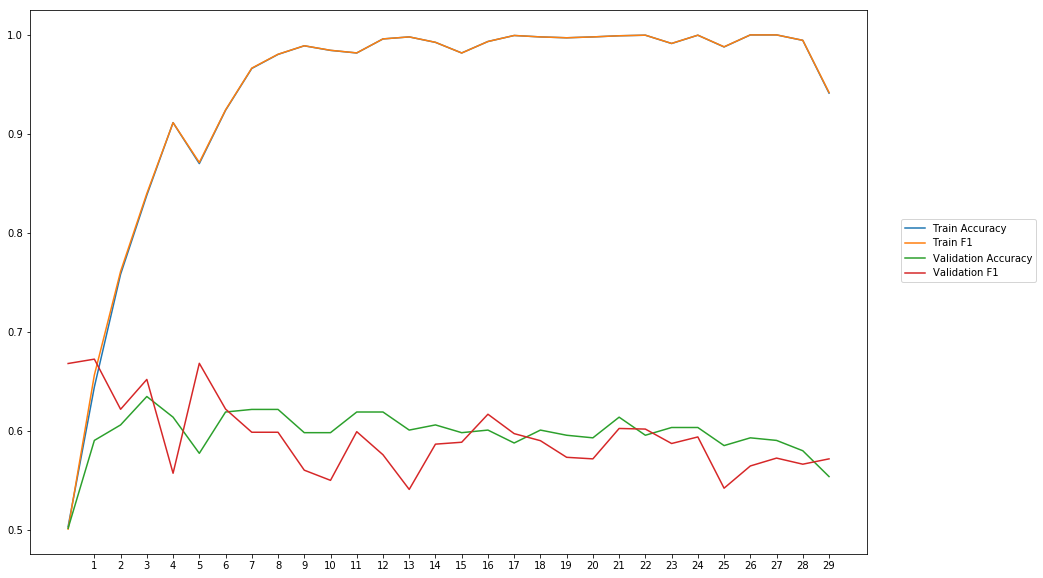

Average Accuracy: 59.71%
Average Precision: 60.57%
Average Recall: 59.58%
Average F1: 59.35%

-----Fold 8--------


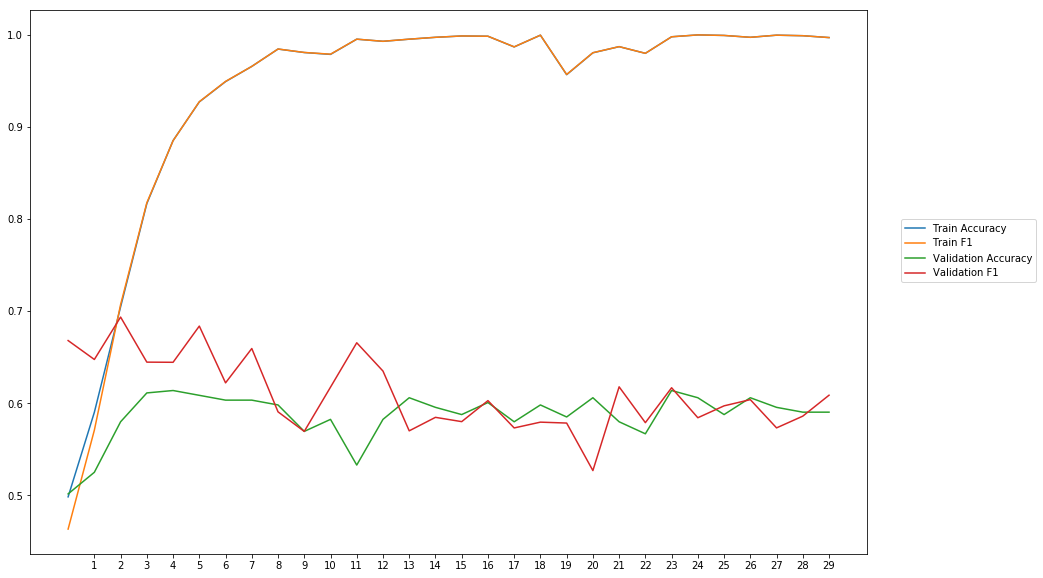

Average Accuracy: 58.67%
Average Precision: 58.49%
Average Recall: 65.78%
Average F1: 60.99%

-----Fold 9--------


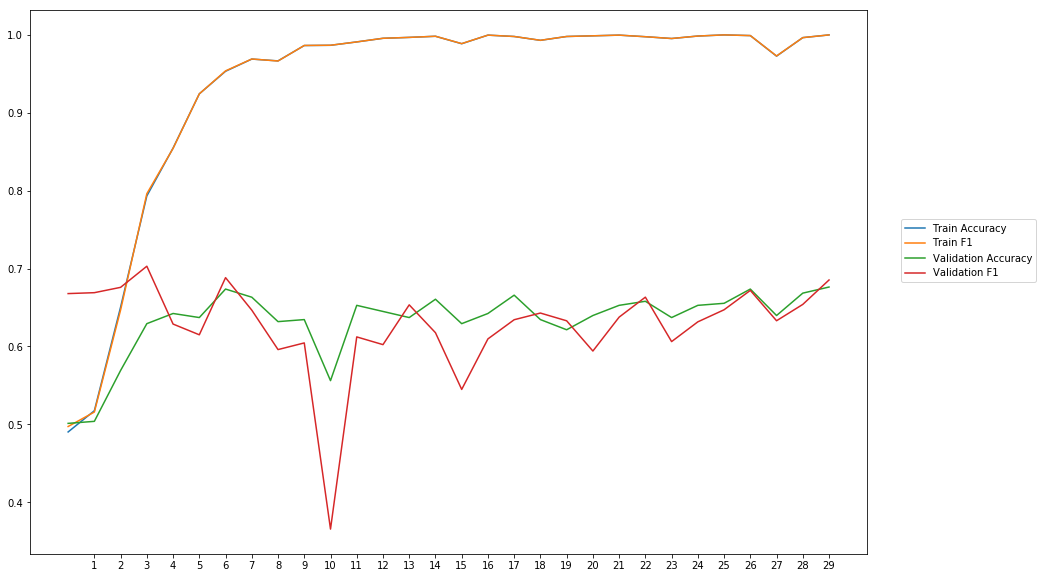

Average Accuracy: 63.28%
Average Precision: 64.97%
Average Recall: 63.47%
Average F1: 62.78%

-----Fold 10--------


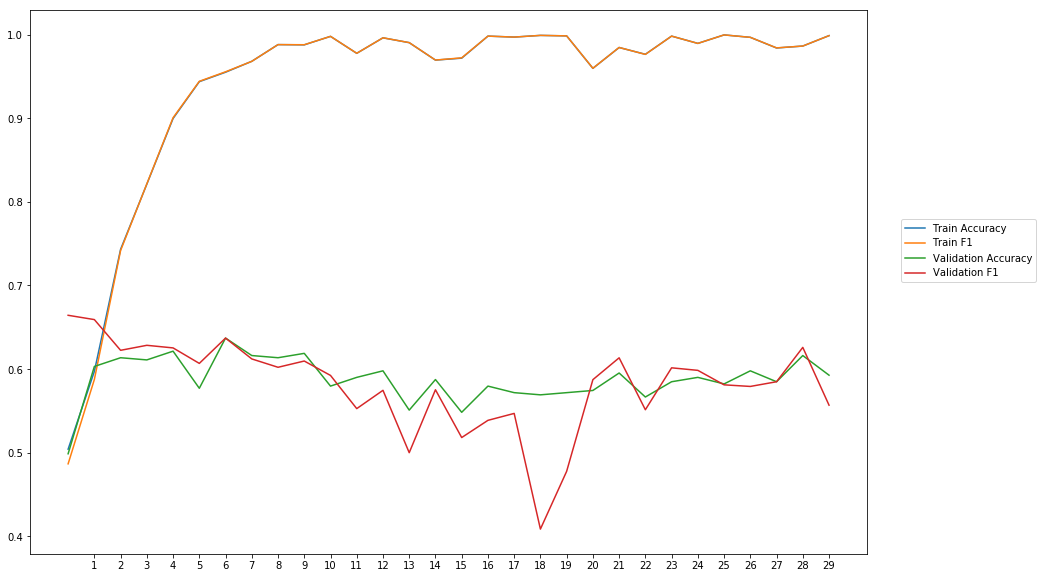

Average Accuracy: 58.81%
Average Precision: 59.53%
Average Recall: 58.19%
Average F1: 58.11%

-------Overallresults-------


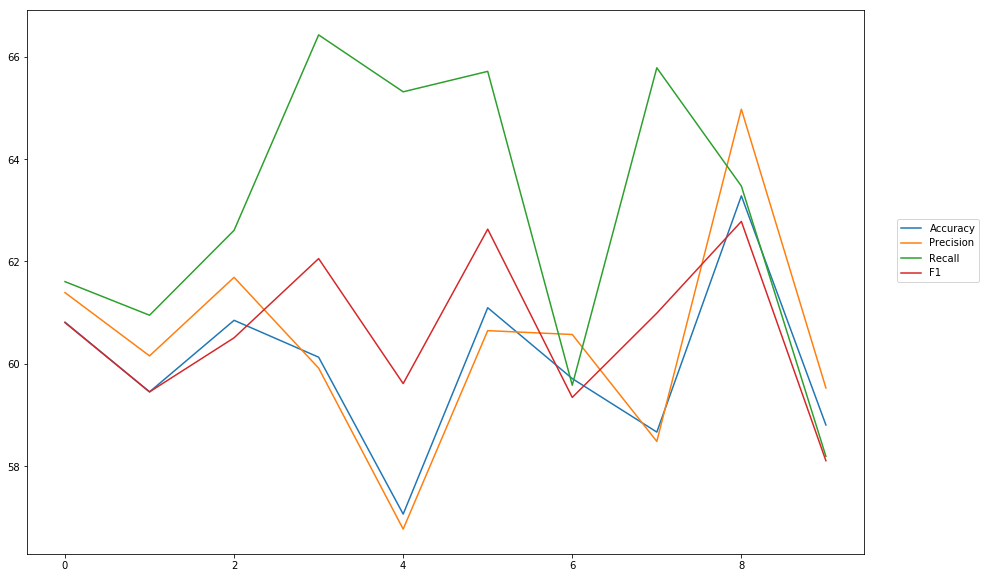

Accuracy: Mean = 59.99% (+/- 1.60%), Max = 63.28%, Min =  57.07%
Precision: Mean = 60.41% (+/- 2.04%), Max = 64.97%, Min =  56.77%
Recall: Mean = 62.96% (+/- 2.71%), Max = 66.42%, Min =  58.19%
F1: Mean = 60.63% (+/- 1.46%), Max = 62.78%, Min =  58.11%


In [21]:
cross_val(model5, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'rnn_1_300')  

## AttentiveRNN one RNN-layer, 200 neurons

In [10]:
wv_layer6 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences6 = wv_layer6(comment_input6)

#RNN Layer
x6 = SimpleRNN(200, return_sequences=True, activation='tanh')(embedded_sequences6)

#Attention Layer
x6 = Attention()(x6)

#Output (Dense) Layer
preds6 = Dense(2, activation='softmax')(x6)

# build the model
model6 = Model(inputs=[comment_input6], outputs=preds6)


-----Fold 1--------


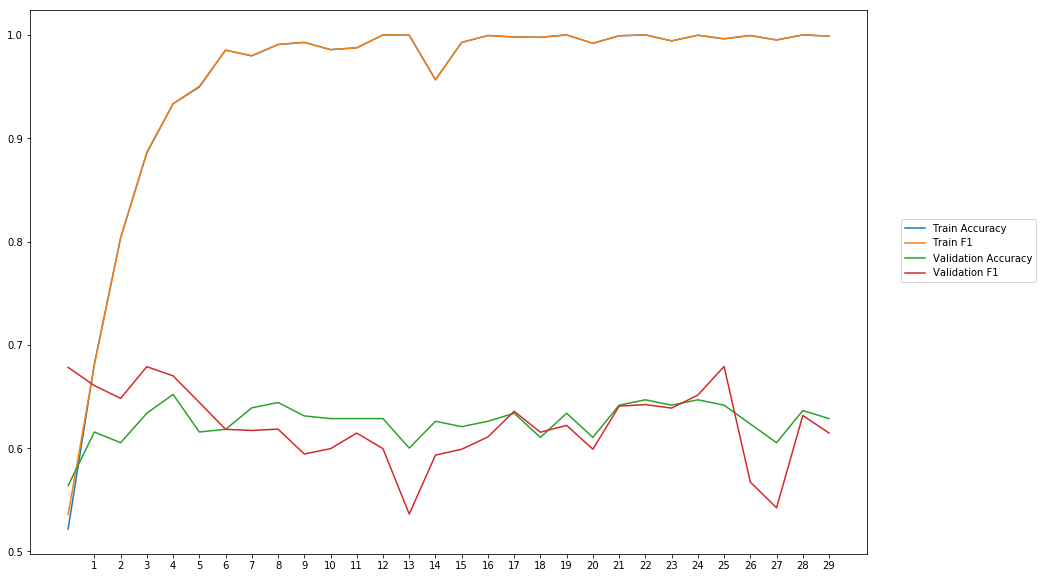

Average Accuracy: 62.59%
Average Precision: 63.31%
Average Recall: 62.18%
Average F1: 62.20%

-----Fold 2--------


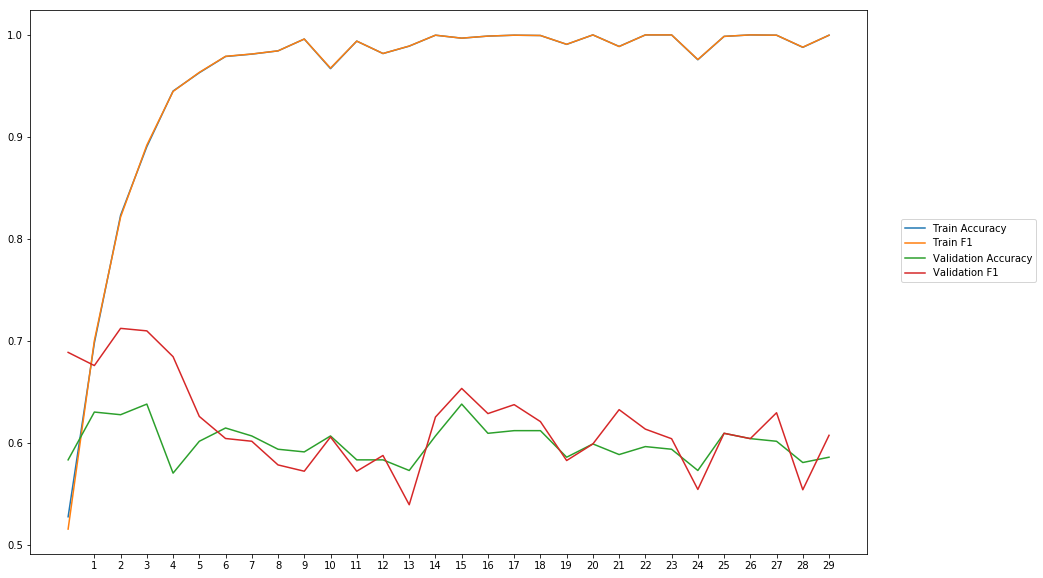

Average Accuracy: 60.00%
Average Precision: 59.50%
Average Recall: 65.28%
Average F1: 61.72%

-----Fold 3--------


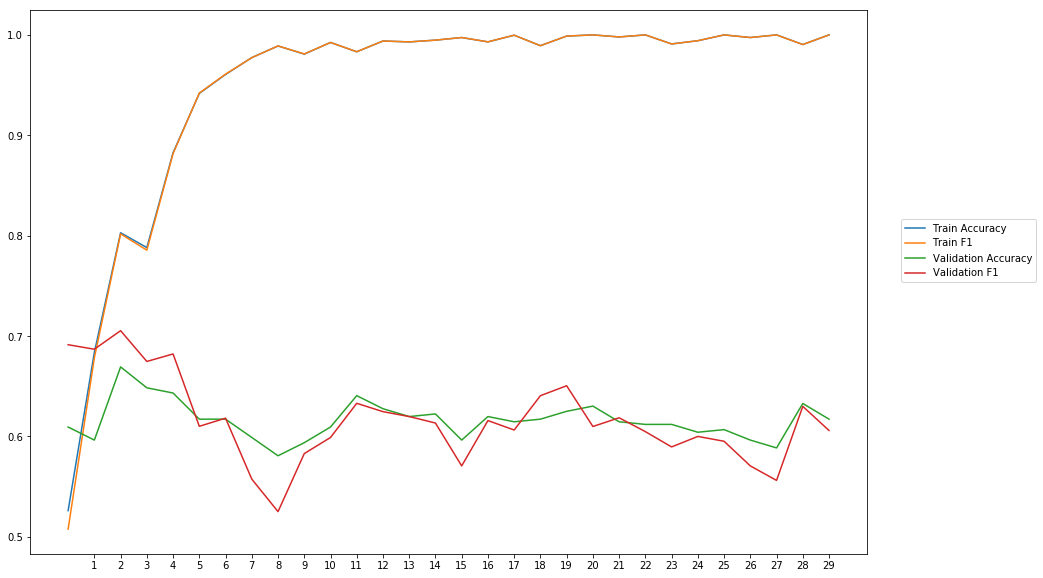

Average Accuracy: 61.61%
Average Precision: 61.90%
Average Recall: 62.19%
Average F1: 61.63%

-----Fold 4--------


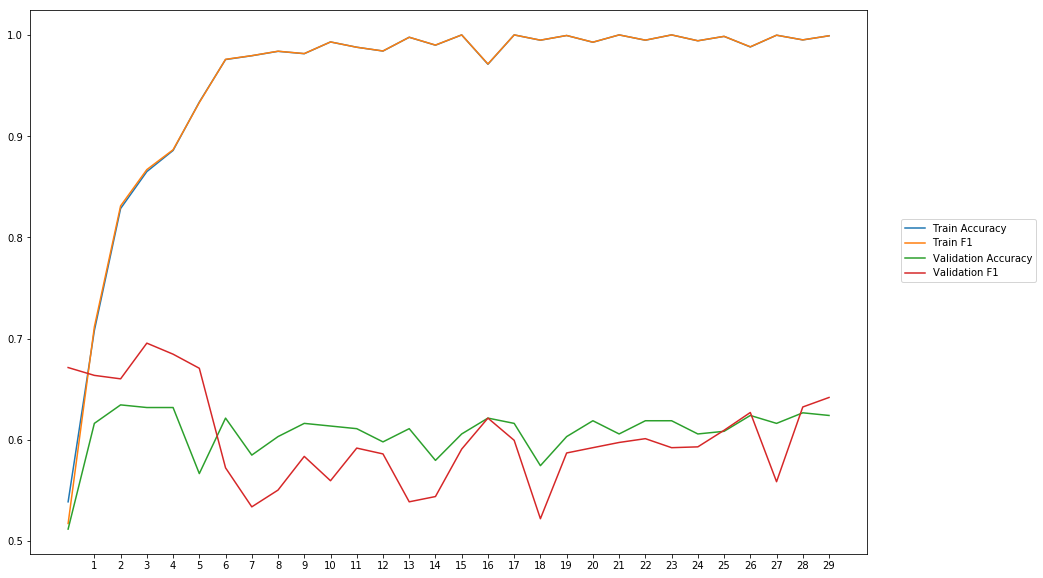

Average Accuracy: 60.73%
Average Precision: 61.63%
Average Recall: 60.68%
Average F1: 60.24%

-----Fold 5--------


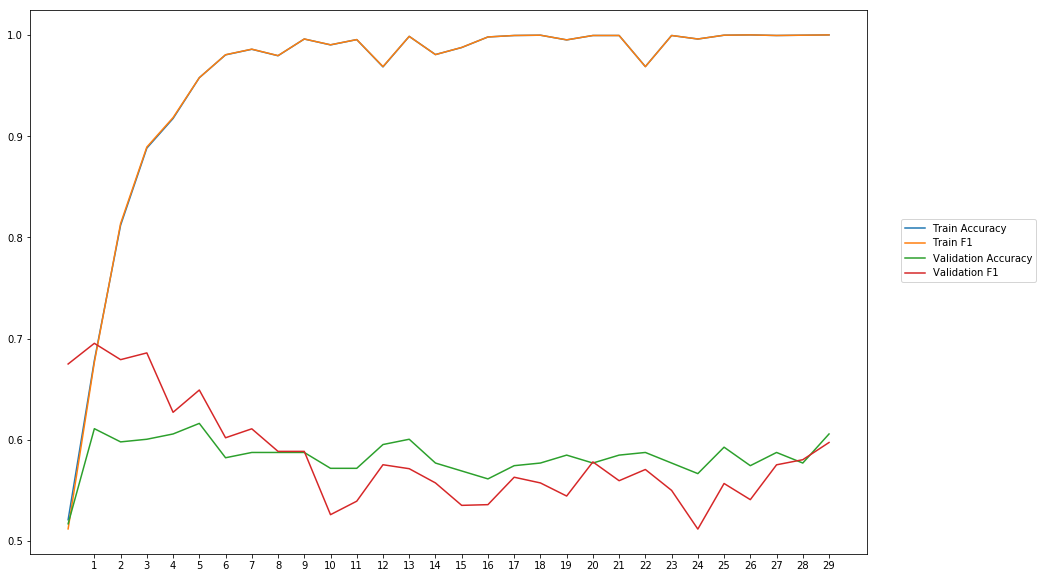

Average Accuracy: 58.36%
Average Precision: 58.63%
Average Recall: 59.79%
Average F1: 58.42%

-----Fold 6--------


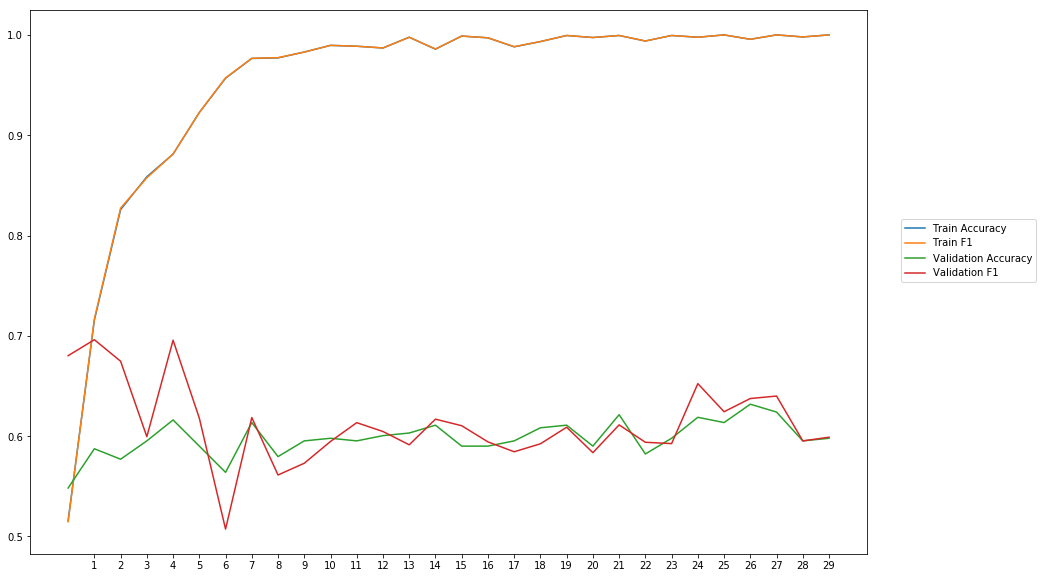

Average Accuracy: 59.81%
Average Precision: 59.49%
Average Recall: 64.34%
Average F1: 61.22%

-----Fold 7--------


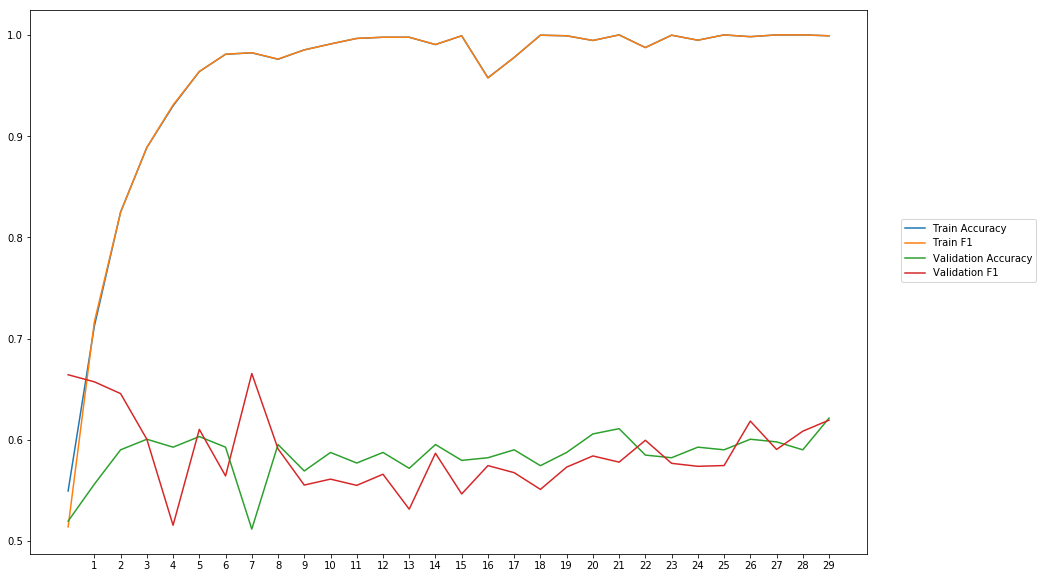

Average Accuracy: 58.47%
Average Precision: 59.06%
Average Recall: 59.91%
Average F1: 58.68%

-----Fold 8--------


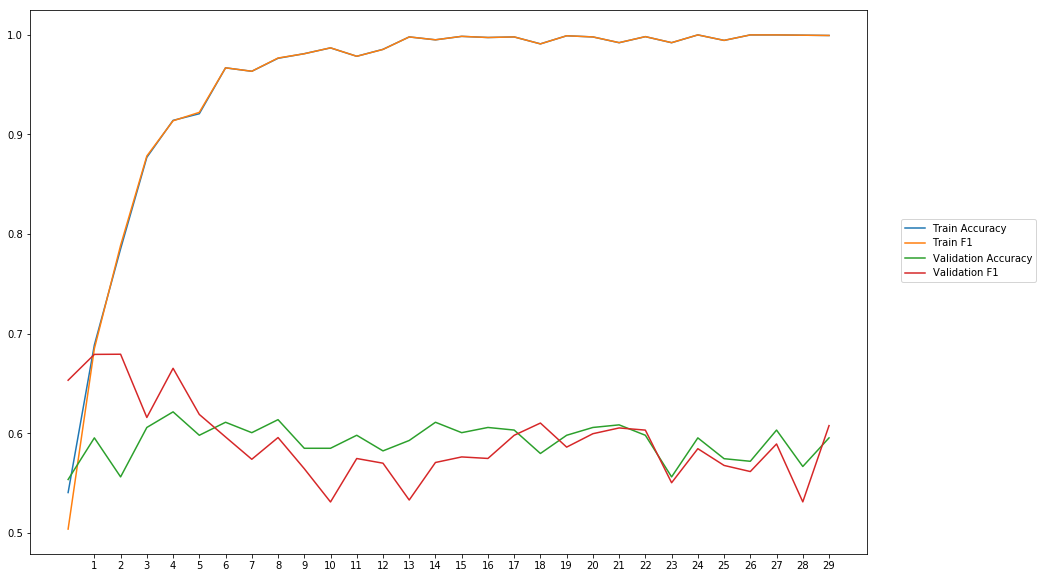

Average Accuracy: 59.23%
Average Precision: 59.68%
Average Recall: 59.98%
Average F1: 59.22%

-----Fold 9--------


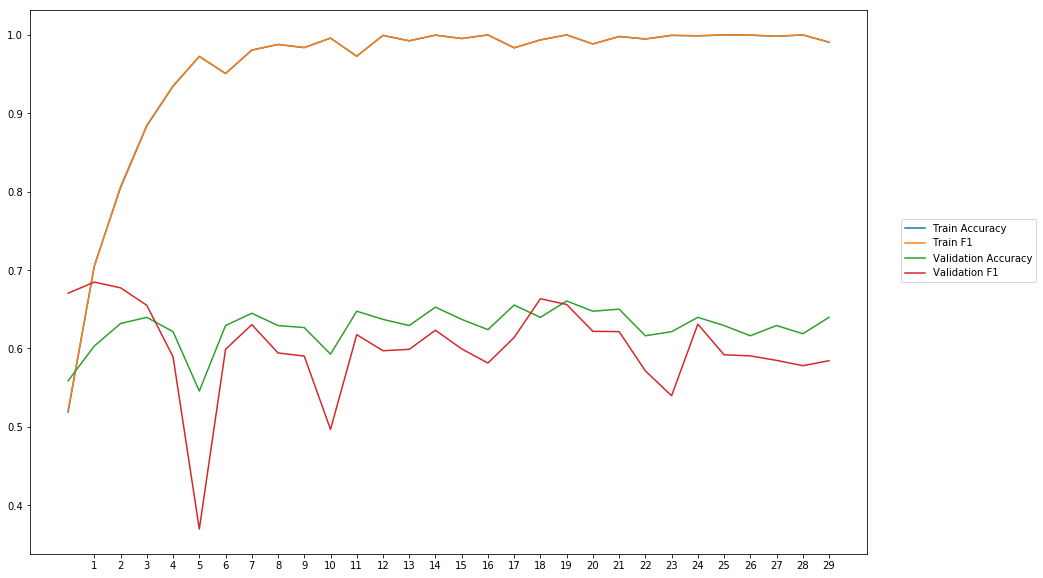

Average Accuracy: 62.72%
Average Precision: 65.08%
Average Recall: 57.33%
Average F1: 60.08%

-----Fold 10--------


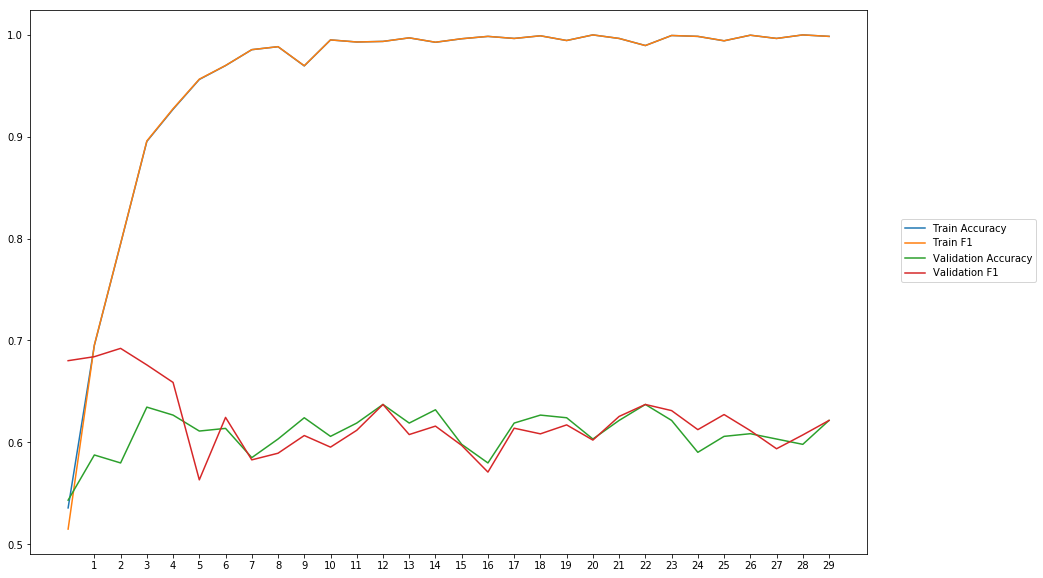

Average Accuracy: 60.92%
Average Precision: 60.87%
Average Recall: 64.41%
Average F1: 62.00%

-------Overallresults-------


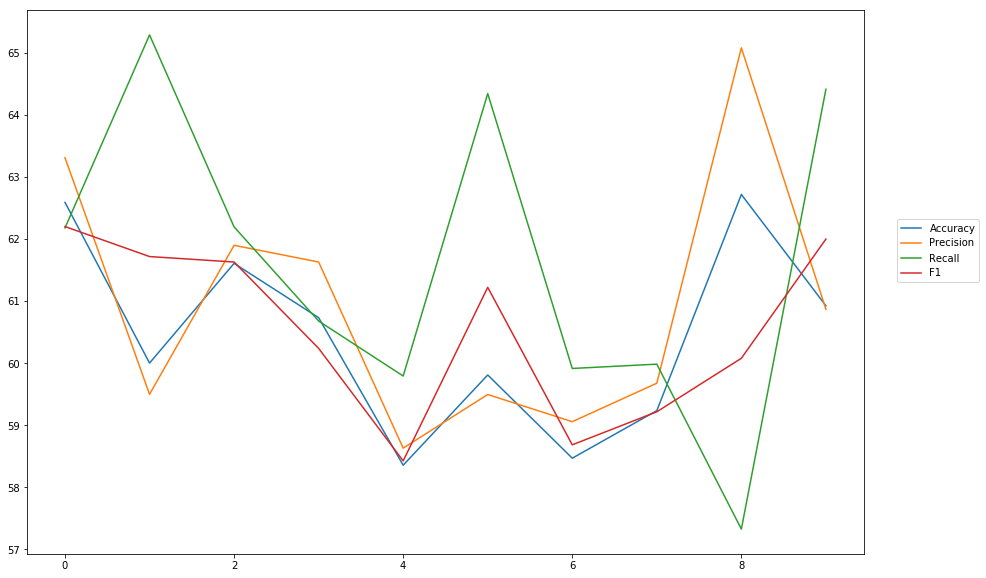

Accuracy: Mean = 60.44% (+/- 1.47%), Max = 62.72%, Min =  58.36%
Precision: Mean = 60.91% (+/- 1.97%), Max = 65.08%, Min =  58.63%
Recall: Mean = 61.61% (+/- 2.40%), Max = 65.28%, Min =  57.33%
F1: Mean = 60.54% (+/- 1.34%), Max = 62.20%, Min =  58.42%


In [22]:
cross_val(model6, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'rnn_1_200')  

## AttentiveRNN one RNN-layer, 100 neurons

In [8]:
wv_layer7 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences7 = wv_layer7(comment_input7)

#RNN Layer
x7 = SimpleRNN(100, return_sequences=True, activation='tanh')(embedded_sequences7)

#Attention Layer
x7 = Attention()(x7)

#Output (Dense) Layer
preds7 = Dense(2, activation='softmax')(x7)

# build the model
model7 = Model(inputs=[comment_input7], outputs=preds7)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


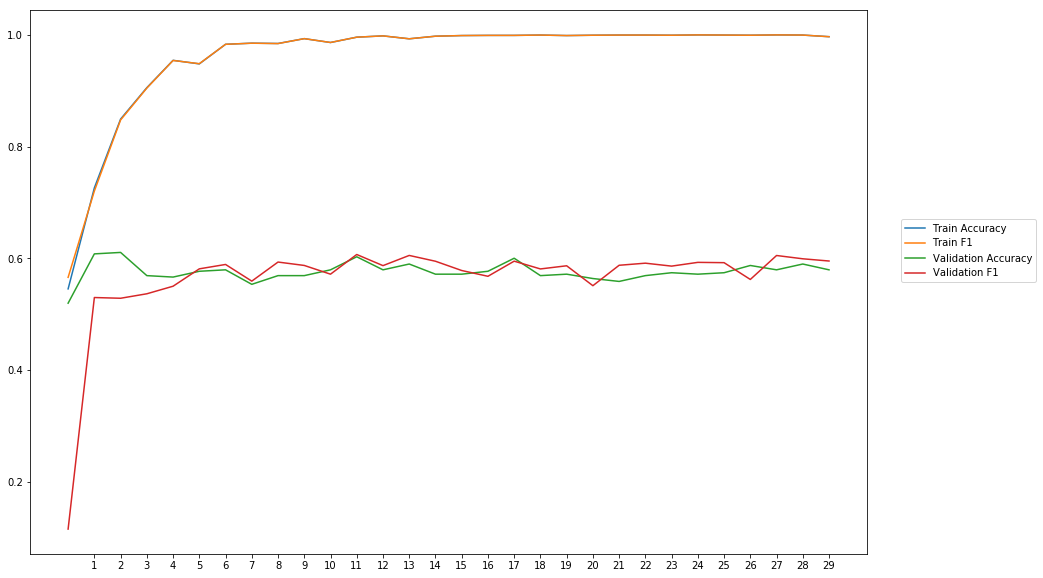

Average Accuracy: 57.58%
Average Precision: 58.24%
Average Recall: 56.70%
Average F1: 56.34%

-----Fold 2--------


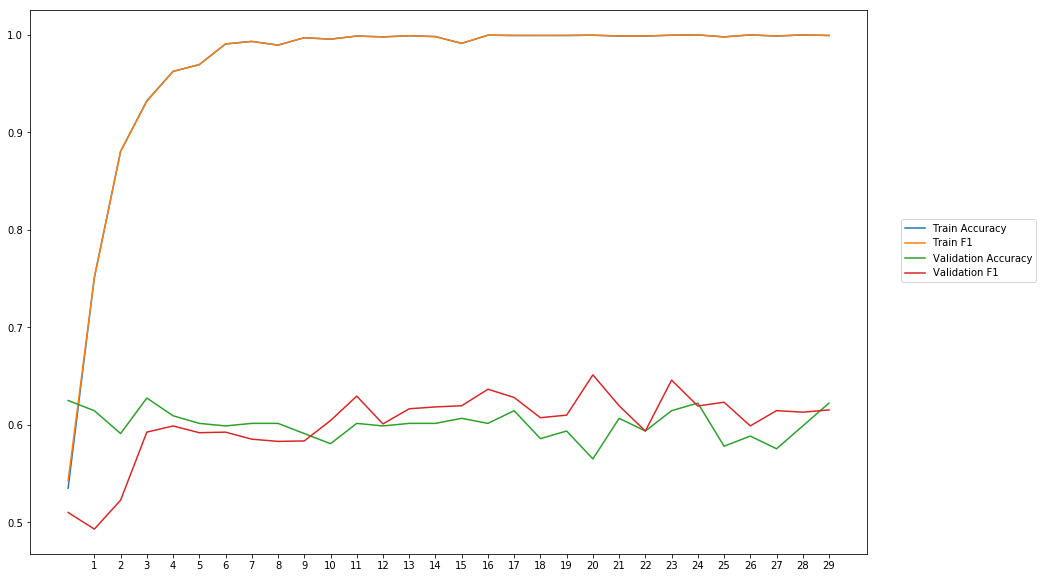

Average Accuracy: 60.05%
Average Precision: 60.23%
Average Recall: 61.19%
Average F1: 60.07%

-----Fold 3--------


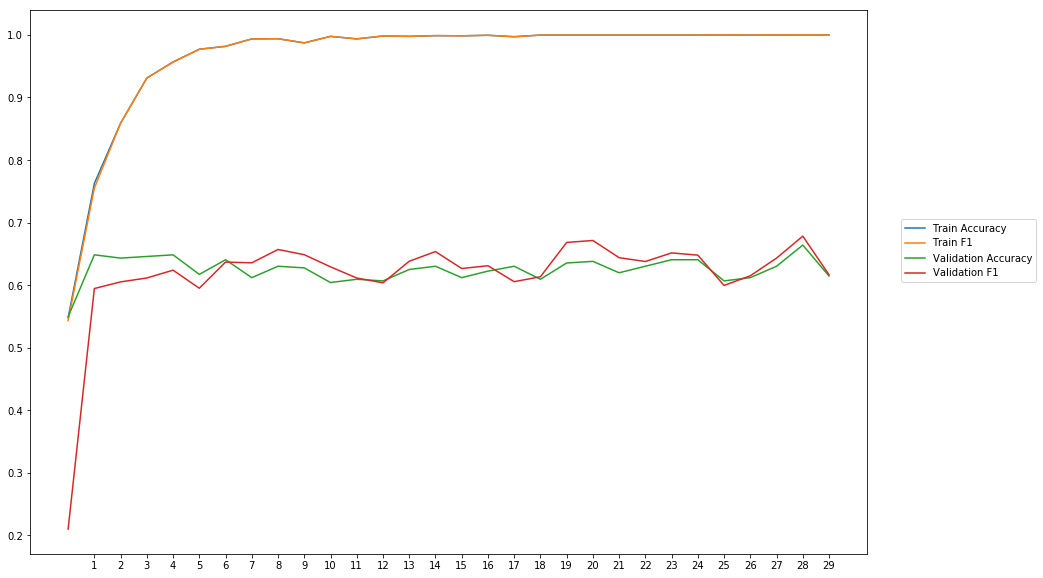

Average Accuracy: 62.48%
Average Precision: 63.02%
Average Recall: 62.55%
Average F1: 61.68%

-----Fold 4--------


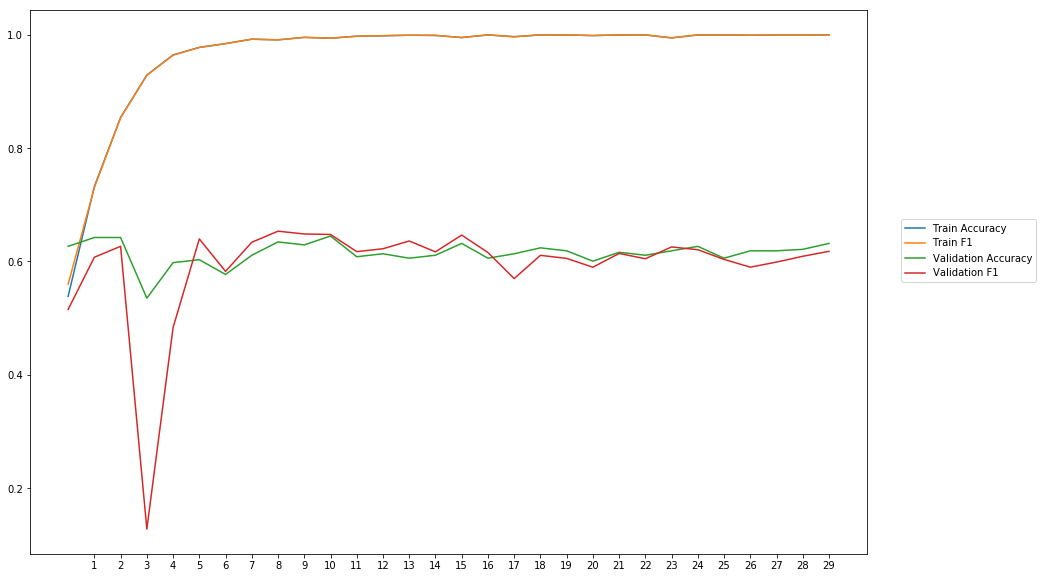

Average Accuracy: 61.49%
Average Precision: 63.65%
Average Recall: 58.48%
Average F1: 59.27%

-----Fold 5--------


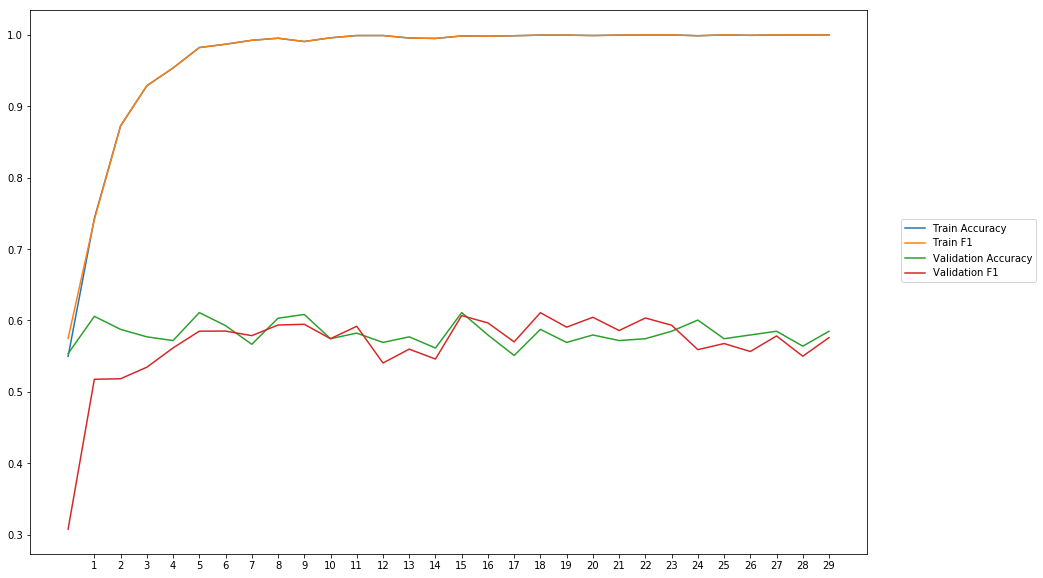

Average Accuracy: 58.13%
Average Precision: 58.92%
Average Recall: 55.38%
Average F1: 56.46%

-----Fold 6--------


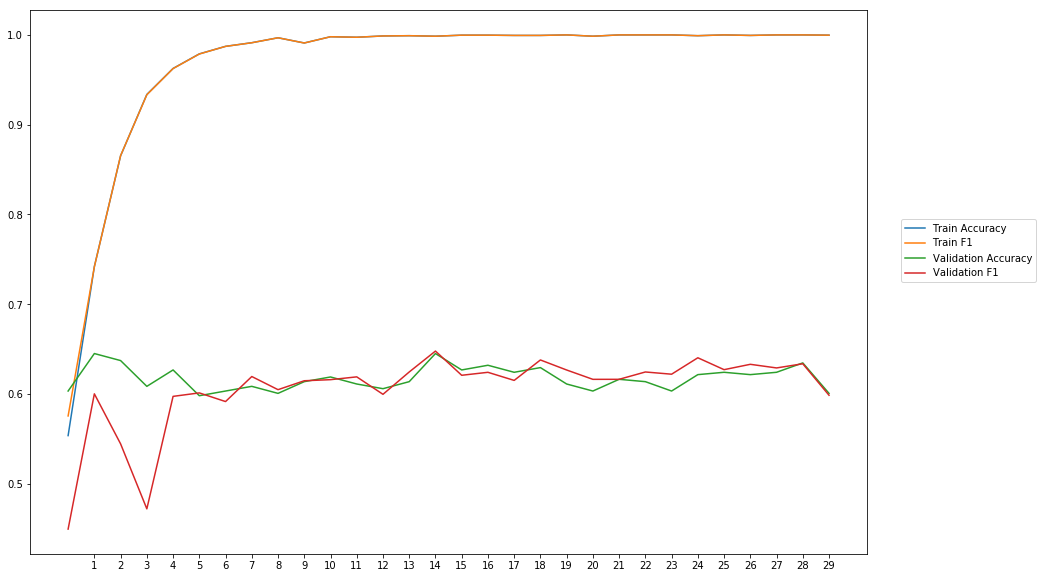

Average Accuracy: 61.74%
Average Precision: 62.73%
Average Recall: 59.70%
Average F1: 60.54%

-----Fold 7--------


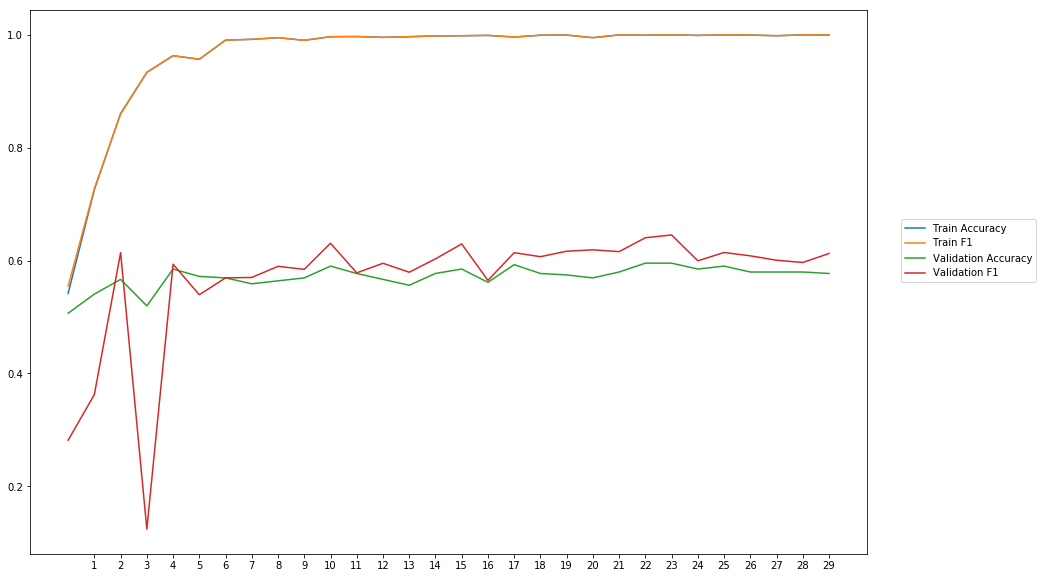

Average Accuracy: 57.13%
Average Precision: 56.98%
Average Recall: 59.53%
Average F1: 56.65%

-----Fold 8--------


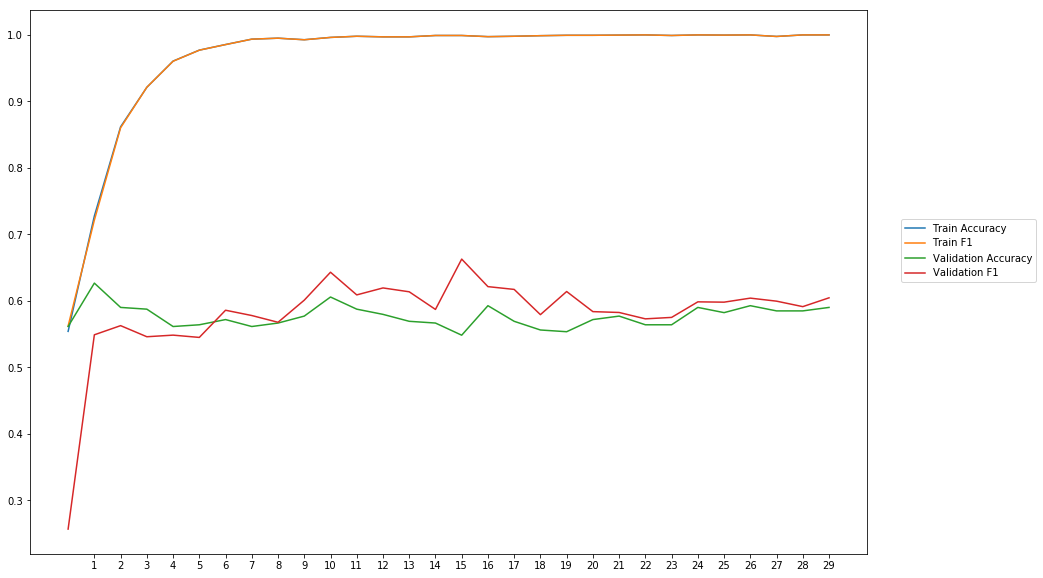

Average Accuracy: 57.66%
Average Precision: 58.17%
Average Recall: 60.40%
Average F1: 58.05%

-----Fold 9--------


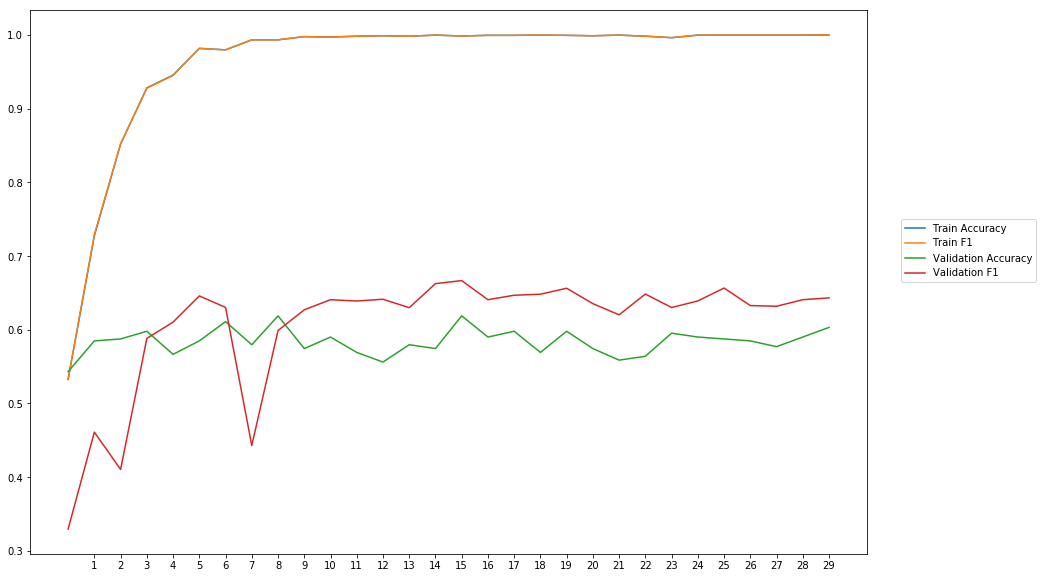

Average Accuracy: 58.39%
Average Precision: 57.94%
Average Recall: 67.33%
Average F1: 60.65%

-----Fold 10--------


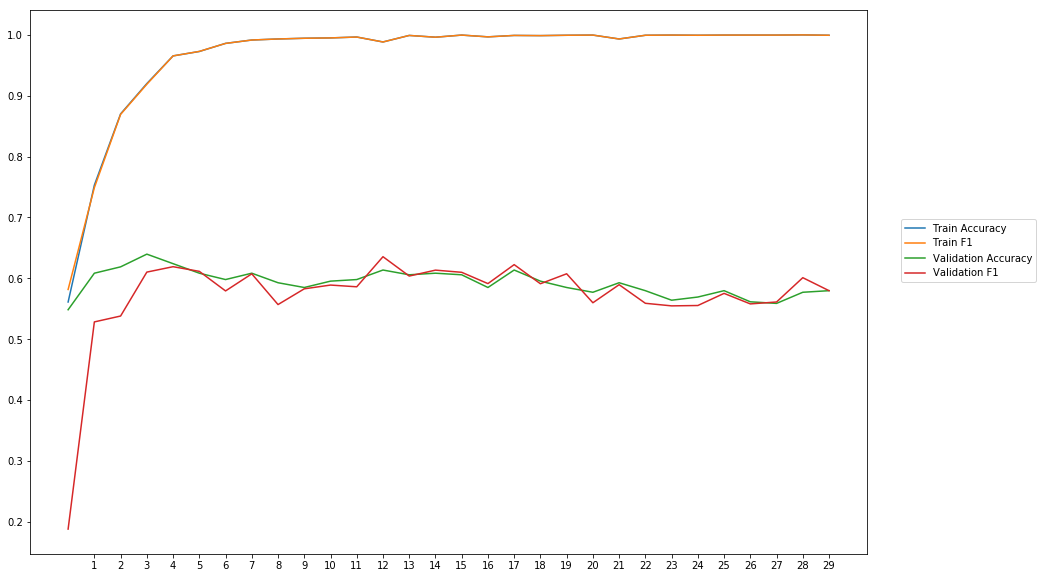

Average Accuracy: 59.25%
Average Precision: 60.87%
Average Recall: 56.13%
Average F1: 57.21%

-------Overallresults-------


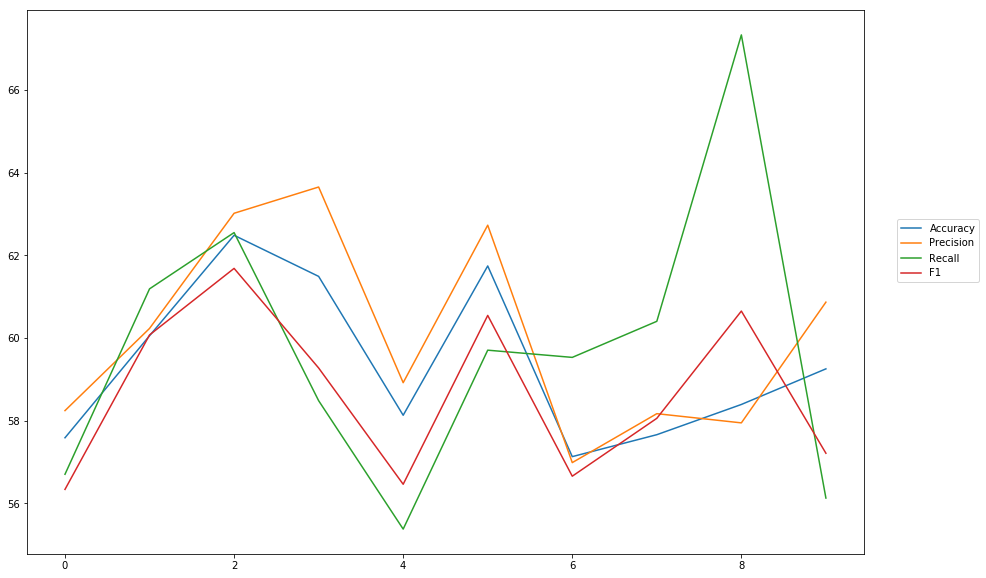

Accuracy: Mean = 59.39% (+/- 1.84%), Max = 62.48%, Min =  57.13%
Precision: Mean = 60.07% (+/- 2.27%), Max = 63.65%, Min =  56.98%
Recall: Mean = 59.74% (+/- 3.33%), Max = 67.33%, Min =  55.38%
F1: Mean = 58.69% (+/- 1.89%), Max = 61.68%, Min =  56.34%


In [9]:
cross_val(model7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'rnn_1_100')  

## Train and evaluate the best model with heldout testdata

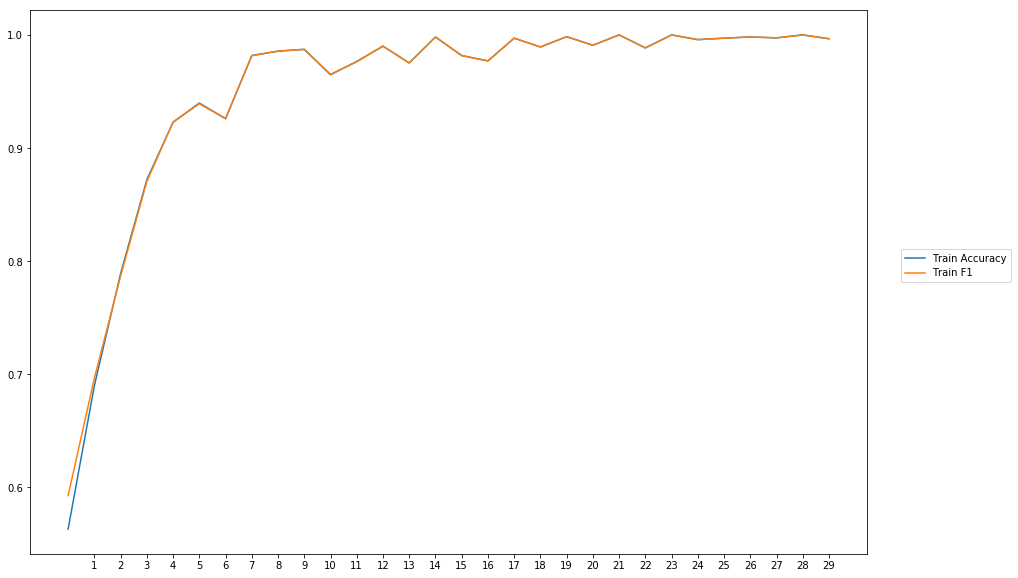


-----Test Scores----
Loss: 1.7761381232008642
Accuracy: 64.79591836734694
Precision: 54.3209876409084
Recall: 70.73954981648247
F1: 61.45250903549398


In [11]:
train_evaluate_final_model(model6, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_AttentiveRNN')